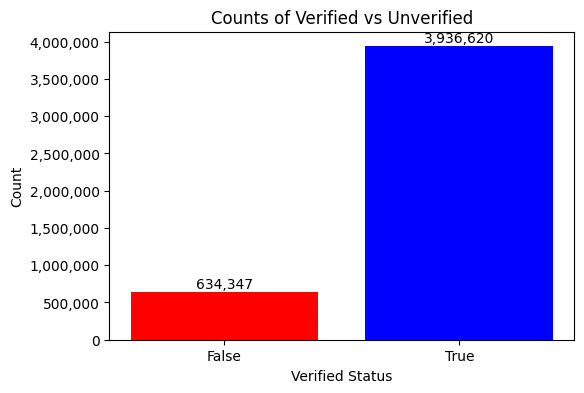

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  # Import ticker module for formatting

# Load the data
df = pd.read_csv('/Users/junjie/lab10spark/verifiedtounverified.txt', sep='\t', header=None, names=['Verified', 'Count'])

# Convert 'Verified' to string to prevent numeric conversion issues
df['Verified'] = df['Verified'].astype(str)
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')  # Ensure count is numeric

# Plot
plt.figure(figsize=(6,4))
plt.bar(df['Verified'], df['Count'], color=['red', 'blue'])

# Labeling
plt.xlabel('Verified Status')
plt.ylabel('Count')
plt.title('Counts of Verified vs Unverified')

# Show exact values on bars
for i, v in enumerate(df['Count']):
    plt.text(i, v + 50000, f"{v:,}", ha='center')  # Format number with commas

# Format y-axis to show full numbers
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # No scientific notation

plt.show()



                        user_id  review_count
0  AHJRJCJMK3XVV4BSPBRAHIYEODWA           664
1  AGMWACNMAG74AXBF7IJ22IOZSZPA           596
2  AGIBXD3LM6HNDWWRTIOJHB5EKNFA           469
3  AEWLQYBQDYWWUWK6UHHTNWO5AHYA           425
4  AHEDJIDSPVYCB3GPRZKGO7YTK6XQ           346
5  AGKOL2ISXEZE6EIPP5VIINFIHGLQ           306
6  AHY7NSZXW4IUPQ2E4BPUOXUVP3UQ           292
7  AHF2J7WG4CPDF2IOVGZITSHQWFJA           262
8  AENQ4UD7LRPE5DW5BFOTE2UCJRWA           245
9  AFVOW2EKNL5O25KG6VA4AIZKSB2A           233


/var/folders/7z/gbbr_68x7x112w14vh8zpfv00000gn/T/ipykernel_7780/194467057.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="review_count", y="user_id", data=top10, palette="viridis")


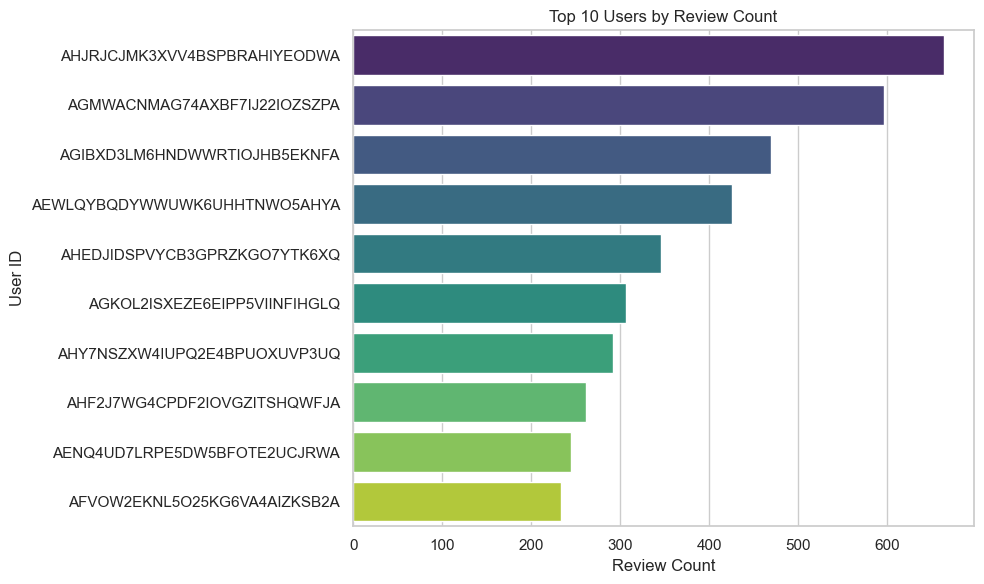

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the review count data.
# Adjust the file path and separator as needed.
# Here we assume the file has no header and is tab-separated.
df = pd.read_csv("/Users/junjie/lab10spark/reviewcountbyuser.txt", sep="\t", header=None, names=["user_id", "review_count"])

# Sort by review_count in descending order and take the top 10
top10 = df.sort_values(by="review_count", ascending=False).head(10)

# Print the top10 for debugging/verification
print(top10)

# Set the seaborn style for a nice plot
sns.set(style="whitegrid")

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="review_count", y="user_id", data=top10, palette="viridis")

# Add labels and title
plt.xlabel("Review Count")
plt.ylabel("User ID")
plt.title("Top 10 Users by Review Count")
plt.tight_layout()

# Display the plot
plt.show()


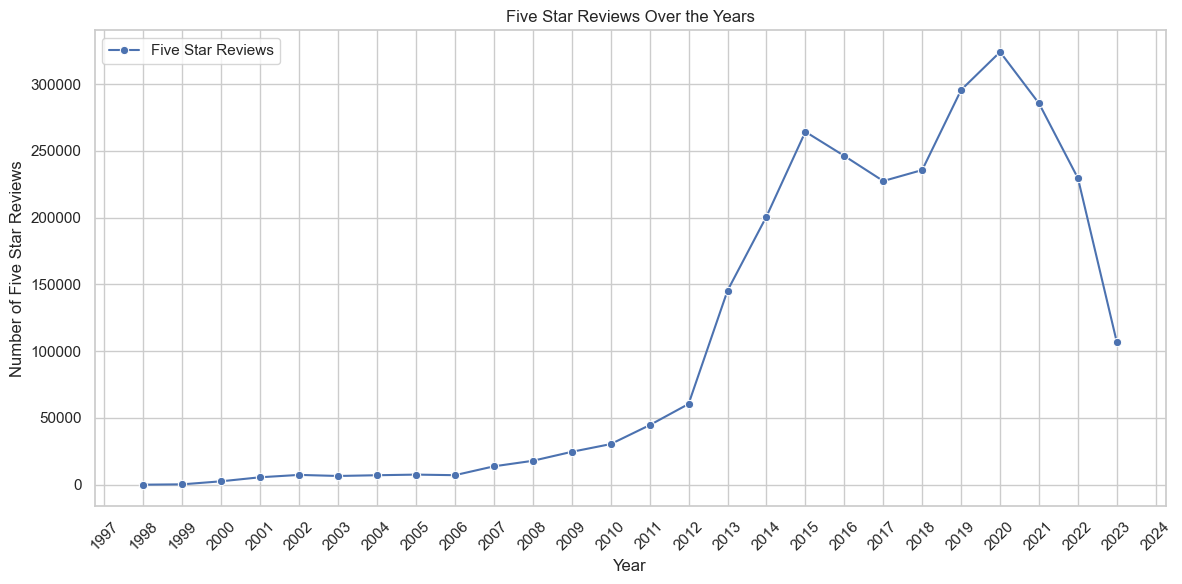

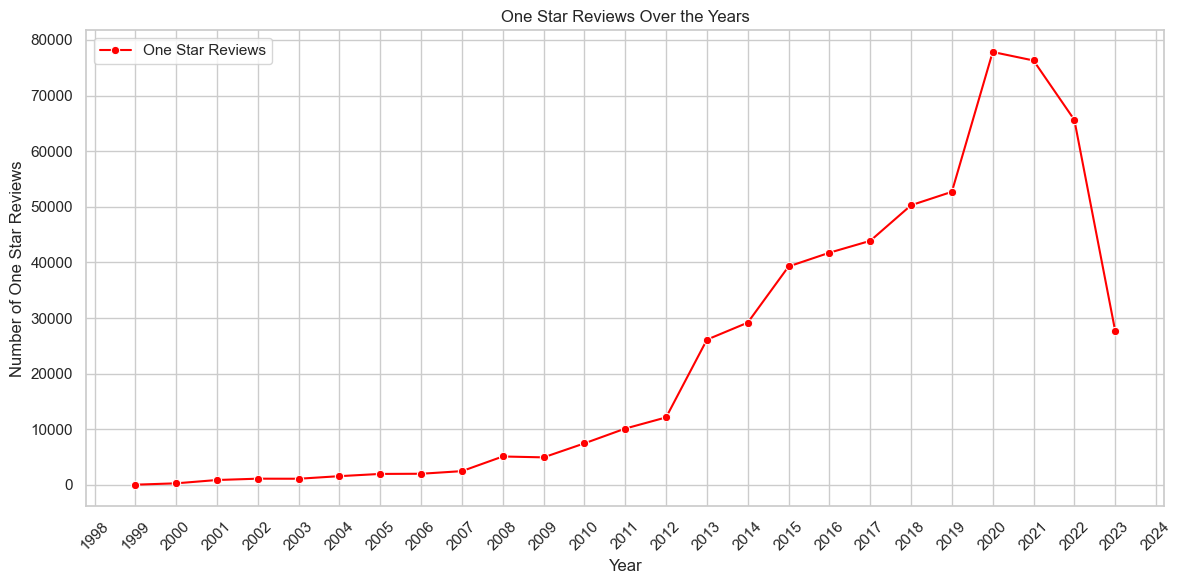

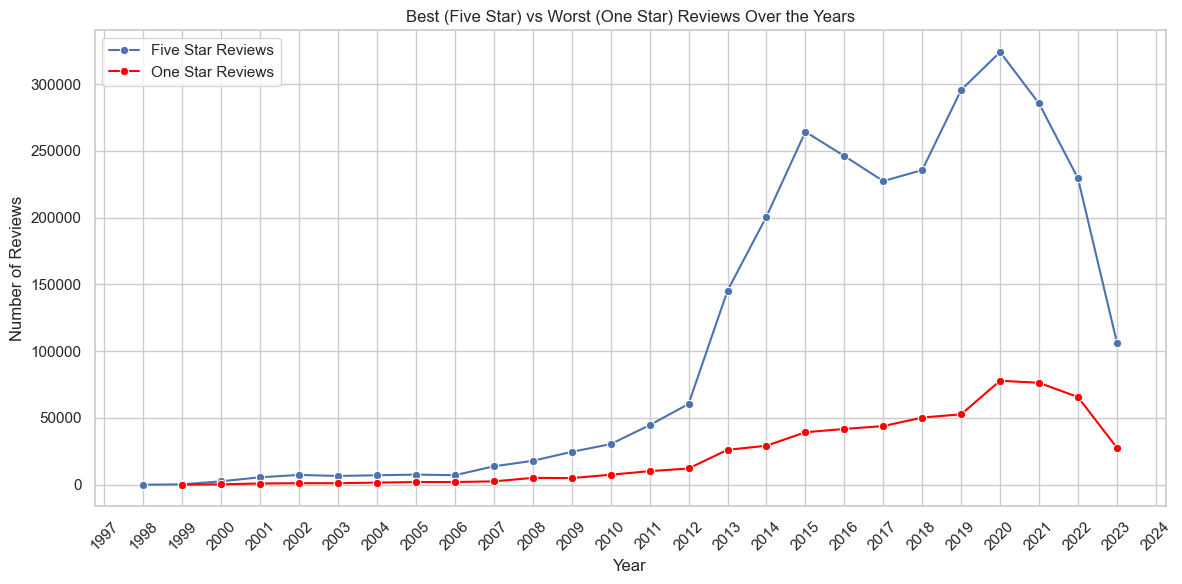

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Load the data.
# Assumes the file is tab-separated with two columns: composite key and count.
df = pd.read_csv("/Users/junjie/lab10spark/RatingByYear.csv", sep="\t", header=None, names=["year_rating", "count"])

# Split the composite key (e.g., "2016_5") into 'year' and 'rating_type'
df[['year', 'rating_type']] = df['year_rating'].str.split('_', expand=True)
df['year'] = df['year'].astype(int)
df['rating_type'] = df['rating_type'].astype(int)

# Sort the DataFrame by year
df.sort_values("year", inplace=True)

# Create separate DataFrames for five-star and one-star reviews
df_five = df[df['rating_type'] == 5]
df_one = df[df['rating_type'] == 1]

# Determine the full range of years in the data
min_year = df['year'].min()
max_year = df['year'].max()
years = range(min_year, max_year + 1)

# -------------------------------
# Visualization 1: Five Star Reviews Over the Years
# -------------------------------
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_five, x="year", y="count", marker="o", label="Five Star Reviews")
plt.title("Five Star Reviews Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Five Star Reviews")
plt.xticks(years, rotation=45)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# Visualization 2: One Star Reviews Over the Years
# -------------------------------
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_one, x="year", y="count", marker="o", color="red", label="One Star Reviews")
plt.title("One Star Reviews Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of One Star Reviews")
plt.xticks(years, rotation=45)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# Visualization 3: Best (Five Star) vs Worst (One Star) Comparison
# -------------------------------
# Pivot the DataFrame to have one row per year with separate columns for one and five star counts.
df_comp = df.groupby(['year', 'rating_type'])['count'].sum().unstack().reset_index()

# Rename the columns. Assuming rating_type 1 is one star and 5 is five star.
df_comp.columns = ["year", "one_star", "five_star"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_comp, x="year", y="five_star", marker="o", label="Five Star Reviews")
sns.lineplot(data=df_comp, x="year", y="one_star", marker="o", label="One Star Reviews", color="red")
plt.title("Best (Five Star) vs Worst (One Star) Reviews Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.xticks(years, rotation=45)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


type  year  one_star  five_star  overall
0     1998       NaN        4.0      6.0
1     1999      35.0      256.0    440.0
2     2000     278.0     2539.0   4754.0
3     2001     874.0     5554.0  10697.0
4     2002    1113.0     7317.0  14177.0


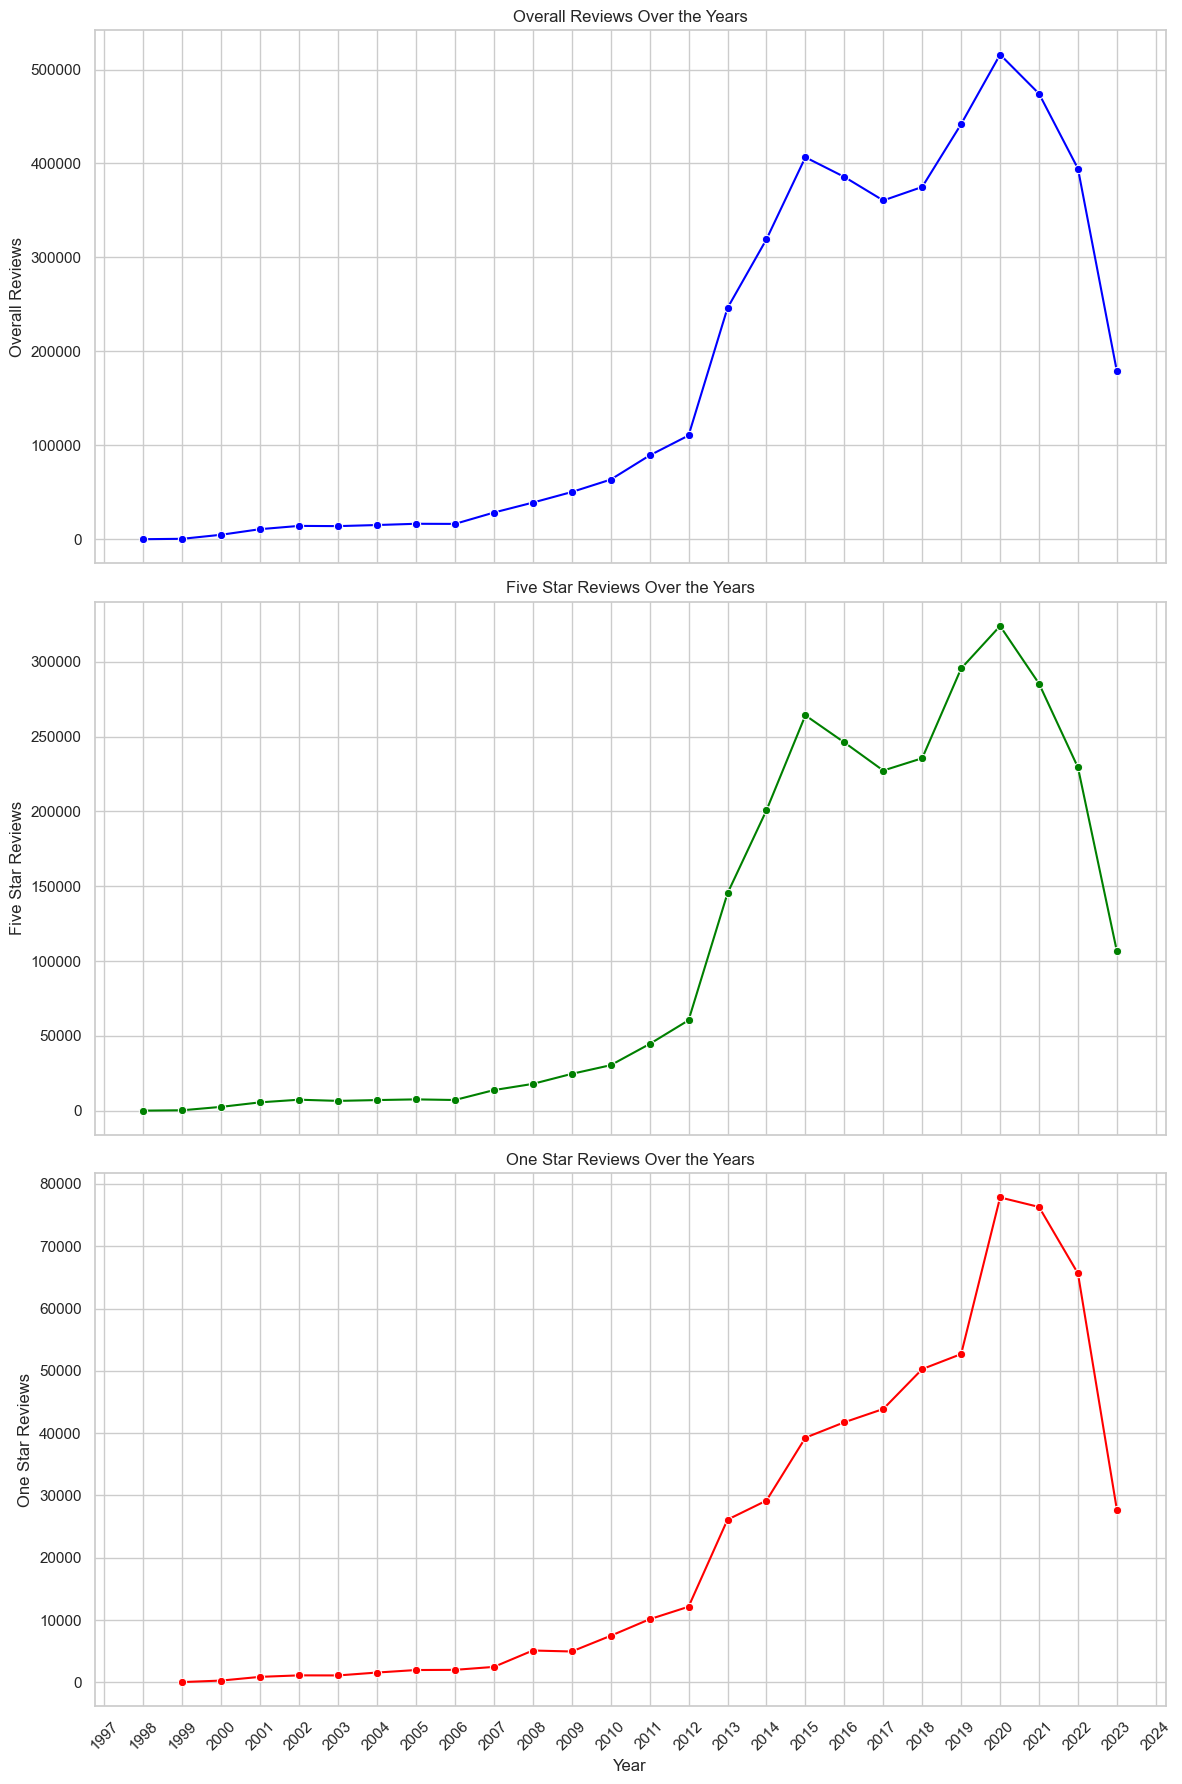

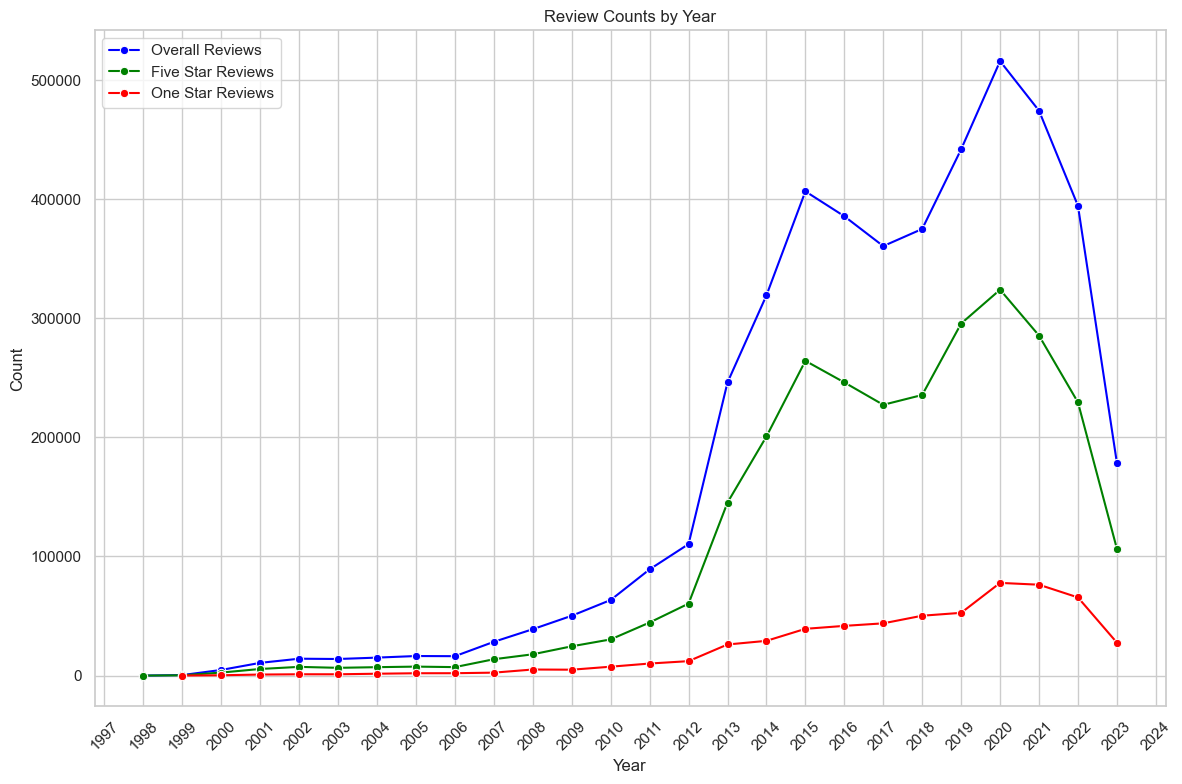

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Load the data (assumed to be tab-separated, no header).
# Example file contents:
# 1998_overall    100
# 1998_5          4
# 1998_1          3
df = pd.read_csv("/Users/junjie/lab10spark/RatingByYear2.csv", sep="\t", header=None, names=["year_key", "count"])

# Split the composite key into 'year' and 'type' (e.g., "1998_overall" splits into "1998" and "overall")
df[['year', 'type']] = df['year_key'].str.split('_', expand=True)
df['year'] = df['year'].astype(int)

# Pivot the data so that each row represents a year and we have separate columns for overall, five-star, and one-star counts.
df_pivot = df.pivot(index='year', columns='type', values='count').reset_index()

# Optional: Rename columns for clarity (if needed).
# Here, we assume the pivot columns are named exactly as "overall", "5", and "1".
df_pivot = df_pivot.rename(columns={'overall': 'overall', '5': 'five_star', '1': 'one_star'})

# Display the pivoted DataFrame (for debugging).
print(df_pivot.head())

# Set Seaborn style.
sns.set(style="whitegrid")

# Determine the full range of years.
min_year = df_pivot['year'].min()
max_year = df_pivot['year'].max()
years = range(min_year, max_year + 1)

# -----------------------------
# Option 1: Separate Subplots
# -----------------------------
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 18), sharex=True)

# Plot 1: Overall Reviews Over the Years.
sns.lineplot(data=df_pivot, x="year", y="overall", marker="o", ax=axs[0], color="blue")
axs[0].set_title("Overall Reviews Over the Years")
axs[0].set_ylabel("Overall Reviews")
axs[0].xaxis.set_major_locator(mticker.MultipleLocator(1))
axs[0].tick_params(axis="x", rotation=45)

# Plot 2: Five-Star Reviews Over the Years.
sns.lineplot(data=df_pivot, x="year", y="five_star", marker="o", ax=axs[1], color="green")
axs[1].set_title("Five Star Reviews Over the Years")
axs[1].set_ylabel("Five Star Reviews")
axs[1].xaxis.set_major_locator(mticker.MultipleLocator(1))
axs[1].tick_params(axis="x", rotation=45)

# Plot 3: One-Star Reviews Over the Years.
sns.lineplot(data=df_pivot, x="year", y="one_star", marker="o", ax=axs[2], color="red")
axs[2].set_title("One Star Reviews Over the Years")
axs[2].set_ylabel("One Star Reviews")
axs[2].set_xlabel("Year")
axs[2].xaxis.set_major_locator(mticker.MultipleLocator(1))
axs[2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# -----------------------------
# Option 2: Combined Line Plot
# -----------------------------
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_pivot, x="year", y="overall", marker="o", label="Overall Reviews", color="blue")
sns.lineplot(data=df_pivot, x="year", y="five_star", marker="o", label="Five Star Reviews", color="green")
sns.lineplot(data=df_pivot, x="year", y="one_star", marker="o", label="One Star Reviews", color="red")

plt.title("Review Counts by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(years, rotation=45)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend()
plt.tight_layout()
plt.show()


   rating    count
0       1   475143
1       2   198628
2       3   275269
3       4   498711
4       5  2488869


/var/folders/7z/gbbr_68x7x112w14vh8zpfv00000gn/T/ipykernel_13183/262742473.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="rating", y="count", palette="viridis")


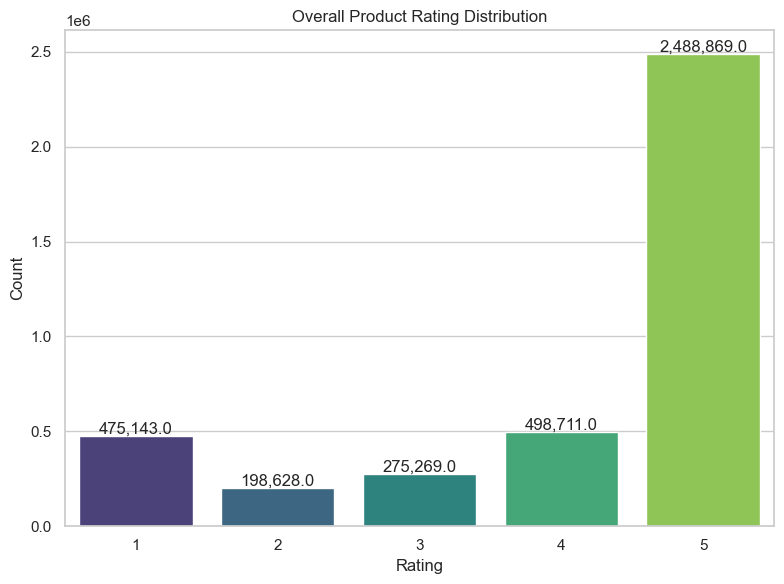

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data file.
# Assuming the file is named "overall_rating_distribution.txt" and is tab-separated.
# It should have no header, so we assign the column names "rating" and "count".
df = pd.read_csv("/Users/junjie/lab10spark/OverallProductRatingDistribution.csv", sep="\t", header=None, names=["rating", "count"])

# Display the DataFrame (optional)
print(df)

# Set a seaborn style for a clean look.
sns.set(style="whitegrid")

# Create a bar plot.
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x="rating", y="count", palette="viridis")

# Set titles and labels.
plt.title("Overall Product Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")

# Optionally add the count value on top of each bar.
for p in ax.patches:
    ax.annotate(format(p.get_height(), ','),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()


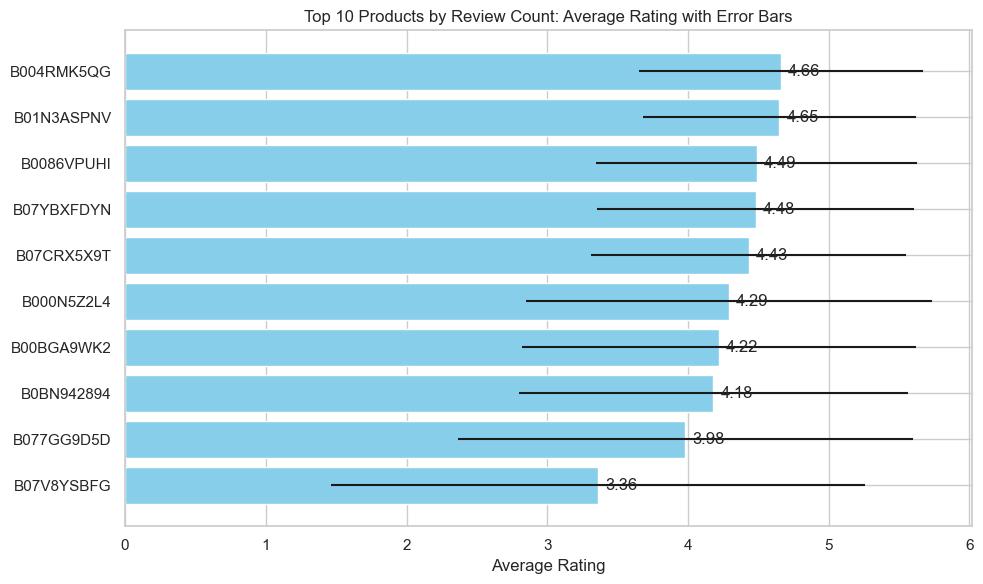

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data.
# Assume the file "weighted_avg_output.txt" is tab-separated with two columns: product_id and JSON string.
df = pd.read_csv("/Users/junjie/lab10spark/weightedaverageandvariance.csv", sep="\t", header=None, names=["product_id", "json_str"])

# 2. Parse the JSON string into separate columns.
# Apply json.loads to each row and convert the result into a DataFrame.
parsed = df["json_str"].apply(json.loads)
df_json = pd.json_normalize(parsed)
# Combine product_id with the parsed JSON columns.
df_combined = pd.concat([df["product_id"], df_json], axis=1)

# 3. Convert data types for proper sorting/plotting.
df_combined["review_count"] = df_combined["review_count"].astype(int)
df_combined["average_rating"] = df_combined["average_rating"].astype(float)
df_combined["variance"] = df_combined["variance"].astype(float)

# 4. Select the Top 10 products based on review_count.
# (You can change this metric if you prefer to sort by average rating.)
top10 = df_combined.sort_values("review_count", ascending=False).head(10)
# Optionally, sort these top 10 by average_rating (for a neater horizontal bar order).
top10 = top10.sort_values("average_rating")

# 5. Compute error bars as the standard deviation (sqrt(variance)).
top10["std_dev"] = np.sqrt(top10["variance"])

# 6. Create a horizontal bar chart.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bars = plt.barh(top10["product_id"], top10["average_rating"], xerr=top10["std_dev"], color="skyblue")
plt.xlabel("Average Rating")
plt.title("Top 10 Products by Review Count: Average Rating with Error Bars")
plt.tight_layout()

# Optionally, annotate each bar with the average rating.
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.show()


# WORKING CODE

In [ ]:
import pandas as pd
import ast
import json

##############################################
# Step A: Process Categories Data
##############################################

# Load the categories CSV file.
categories_df = pd.read_csv("combined_main_categories.csv")

# Debug: Show the original value and type of the 'parent_asin' column.
print("Original parent_asin sample (first row):")
print(categories_df['parent_asin'].iloc[0])
print("Type:", type(categories_df['parent_asin'].iloc[0]))

# Function to convert the string representation to a list.
def convert_to_list(x):
    if isinstance(x, str):
        x = x.strip()
        if x.startswith('[') and x.endswith(']'):
            try:
                result = ast.literal_eval(x)
                if not isinstance(result, list):
                    return [result]
                return result
            except Exception as e:
                print("Conversion error:", e, "for value:", x)
                return [x]
        else:
            return [x]  # Wrap in a list if it doesn't look like one.
    return x

# Convert the 'parent_asin' column.
categories_df['parent_asin'] = categories_df['parent_asin'].apply(convert_to_list)

# Debug: Check conversion result and type.
print("After conversion sample (first row):")
print(categories_df['parent_asin'].iloc[0])
print("Type:", type(categories_df['parent_asin'].iloc[0]))

# Explode the list twice to ensure full flattening.
categories_exploded_df = categories_df.explode('parent_asin')
categories_exploded_df = categories_exploded_df.explode('parent_asin')

# Rename the column to 'asin' for clarity.
categories_exploded_df = categories_exploded_df.rename(columns={'parent_asin': 'asin'})

# Normalize the 'asin' column: convert to string, strip spaces, and lowercase.
categories_exploded_df['asin'] = categories_exploded_df['asin'].astype(str).str.strip().str.lower()

# Debug: Check a sample of the exploded categories data.
print("Categories DataFrame (Exploded & Normalized) Sample:")
print(categories_exploded_df[['new_category', 'asin']].head(10))

##############################################
# Step B: Process Reviews Data and Rolling Analysis
##############################################

# Load the reviews CSV file.
# Assumes it's tab-separated with no header:
# Column 0: review id, Column 1: JSON string with review details.
reviews_df = pd.read_csv("cleaned_user_reviews.csv", sep="\t", header=None, names=["id", "json_str"])

# Debug: Check the raw reviews sample.
print("Raw Reviews Sample:")
print(reviews_df.head())

# Parse the JSON strings into Python dictionaries.
reviews_df['json'] = reviews_df['json_str'].apply(json.loads)

# Normalize the JSON data into a flat DataFrame.
reviews_normalized = pd.json_normalize(reviews_df['json'])

# Add back the review id.
reviews_normalized['id'] = reviews_df['id']

# Debug: Check the normalized reviews sample.
print("Normalized Reviews Sample:")
print(reviews_normalized[['id', 'parent_asin', 'rating', 'timestamp']].head())

# Convert Unix timestamp (assumed to be in milliseconds) to datetime.
reviews_normalized['timestamp'] = pd.to_datetime(reviews_normalized['timestamp'], unit='ms')

# Normalize the ASIN: trim spaces and convert to lowercase.
reviews_normalized['asin'] = reviews_normalized['parent_asin'].str.strip().str.lower()

# Optionally, drop the original 'parent_asin' column.
reviews_normalized = reviews_normalized.drop(columns=['parent_asin'])

# Sort the reviews DataFrame by timestamp.
reviews_normalized = reviews_normalized.sort_values(by='timestamp')

# Debug: Check the processed reviews sample.
print("Processed Reviews Sample:")
print(reviews_normalized[['id', 'asin', 'rating', 'timestamp']].head(10))

# --- Monthly Aggregation by ASIN ---
# Group by product (asin) and resample by month. Using 'ME' for month-end frequency.
monthly_agg = reviews_normalized.groupby('asin').resample('ME', on='timestamp').agg(
    avg_rating=('rating', 'mean'),
    review_count=('id', 'count')
).reset_index()

# Debug: Check the monthly aggregated data.
print("Monthly Aggregated Data Sample:")
print(monthly_agg.head(20))

# --- Compute Rolling Window Metrics ---
# Compute a 3-month rolling average for monthly avg_rating and a 3-month rolling sum for review_count.
monthly_agg['rolling_avg_rating'] = monthly_agg.groupby('asin')['avg_rating'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)
monthly_agg['rolling_review_count'] = monthly_agg.groupby('asin')['review_count'].transform(
    lambda x: x.rolling(window=3, min_periods=1).sum()
)

# Debug: Check the rolling window sample.
print("Rolling Time Window Sample:")
print(monthly_agg.head(20))

##############################################
# Step C: Merge Rolling Analysis with Categories Data
##############################################

# Merge the rolling time series (monthly_agg) with the categories data (categories_exploded_df)
# on the common key 'asin'. We use a left join on monthly_agg to preserve the time series.
monthly_agg_with_cat = pd.merge(monthly_agg, categories_exploded_df[['asin', 'new_category']],
                                on="asin", how="left")

# Debug: Check merged result.
print("Rolling Time Window with Category Sample:")
print(monthly_agg_with_cat.head(20))

# Optionally, save the merged output to a CSV file.
monthly_agg_with_cat.to_csv("rolling_time_window_with_category.csv", index=False)


Original parent_asin sample (first row):
[['B001RNO1LI', 'B07Y8NXJ83', 'B0002B90SU', 'B00YARF1SU', 'B007P6IPOK', 'B00004UA2O', 'B096YHC6WF', 'B07DRJQZGK', 'B07C7K8WXT', 'B07PH3L6RG', 'B095S82HDX', 'B00K133CBU', 'B0002B90SK', 'B000BKRK16', 'B000BAY8KW', 'B0031SWWPO', 'B07ZPZFCQF', 'B07BGY7GWH', 'B0002B90S0', 'B0BGHLSJF1', 'B003KVX22O', 'B003Y1W7YO', 'B0B5SV7L99', 'B001RNO1KE', 'B07RCFD9QL', 'B00IMLCB9M', 'B07G2ZS2KB', 'B07H486ZZ4', 'B000S6R2WA', 'B00I928MQ0', 'B00VHX9WTE', 'B001LNUG04', 'B002EAM0RU', 'B0041C87TE', 'B0002B90RG', 'B00CD14APA', 'B008VFUQX2', 'B00ZGEWMBA', 'B00NAW67RA', 'B000EYAEN0', 'B076XWTJ2D', 'B07YLZ82GY', 'B0000AW9U5', 'B001RNO1JA', 'B0055NQHNQ', 'B0C34WRGX5', 'B006D8TJSW', 'B01E0CV8OU', 'B000XRY6O6', 'B007MJSZDQ', 'B00PKYYWC8', 'B079JGKYVJ', 'B097ZJ3FDV', 'B0711F8SY8', 'B0B397792H', 'B001RNO1IG', 'B000EAASDA', 'B09YTWMRTP', 'B00BSEDX74', 'B0BKQ82VJ4', 'B01FF9W6IO', 'B00VRSXUS8', 'B00JUTJYFE', 'B07RGKHRNW', 'B0846PM1LX', 'B097NT1K8J', 'B0002B90TE', 'B01KSCPEWI', 'B098

In [2]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

# Step 1: Start Spark Session and Load Data
spark = SparkSession.builder.appName("PredictiveModel").getOrCreate()
df = spark.read.csv("rolling_time_window_with_category.csv", header=True, inferSchema=True)

# Print schema and a sample
df.printSchema()
df.show(5, truncate=False)

# Remove rows with null or NaN in the label column "rolling_avg_rating"
df_clean = df.na.drop(subset=["rolling_avg_rating"])
print("Rows after dropping null labels:", df_clean.count())

# Step 2: Prepare Features for Modeling
# We'll predict 'rolling_avg_rating' using as features: "rolling_review_count", "review_count", and the categorical field "new_category"

# Index the categorical column 'new_category'
indexer = StringIndexer(inputCol="new_category", outputCol="new_category_index", handleInvalid="keep")

# One-Hot Encode the indexed category
encoder = OneHotEncoder(inputCol="new_category_index", outputCol="new_category_vec")

# Assemble features: include numerical features and the encoded category vector
assembler = VectorAssembler(
    inputCols=["rolling_review_count", "review_count", "new_category_vec"],
    outputCol="features"
)

# Step 3: Build the Regression Model
# We will use a Linear Regression model where the label is the 'rolling_avg_rating'
lr = LinearRegression(featuresCol="features", labelCol="rolling_avg_rating")

# Build a pipeline with the indexer, encoder, assembler, and regression model
pipeline = Pipeline(stages=[indexer, encoder, assembler, lr])

# Step 4: Split Data and Train the Model
train_df, test_df = df_clean.randomSplit([0.8, 0.2], seed=42)
model = pipeline.fit(train_df)

# Step 5: Make Predictions on the Test Data
predictions = model.transform(test_df)
predictions.select("features", "rolling_avg_rating", "prediction").show


root
 |-- asin: string (nullable = true)
 |-- timestamp: date (nullable = true)
 |-- avg_rating: double (nullable = true)
 |-- review_count: integer (nullable = true)
 |-- rolling_avg_rating: double (nullable = true)
 |-- rolling_review_count: double (nullable = true)
 |-- new_category: string (nullable = true)

+----------+----------+----------+------------+------------------+--------------------+------------+
|asin      |timestamp |avg_rating|review_count|rolling_avg_rating|rolling_review_count|new_category|
+----------+----------+----------+------------+------------------+--------------------+------------+
|0007922582|2018-04-30|2.0       |1           |2.0               |1.0                 |Video Games |
|0008288194|2022-01-31|3.0       |1           |3.0               |1.0                 |Media       |
|0028179714|2014-03-31|5.0       |1           |5.0               |1.0                 |Video Games |
|0028179714|2014-04-30|NULL      |0           |5.0               |1.0           

Rows after dropping null labels: 2138512


25/03/21 17:14:38 WARN Instrumentation: [1fbf313c] regParam is zero, which might cause numerical instability and overfitting.
25/03/21 17:14:40 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
25/03/21 17:14:40 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
25/03/21 17:14:40 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


<bound method DataFrame.show of DataFrame[features: vector, rolling_avg_rating: double, prediction: double]>

In [7]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# Step 1: Start Spark Session and Load Data
spark = SparkSession.builder.appName("HyperparameterTuning").getOrCreate()
df = spark.read.csv("rolling_time_window_with_category.csv", header=True, inferSchema=True)

# Ensure rows with null labels are dropped.
df = df.na.drop(subset=["rolling_avg_rating"])

# Check the schema (should include: asin, rolling_avg_rating, rolling_review_count, review_count, new_category, etc.)
df.printSchema()
df.show(5, truncate=False)

# Step 2: Prepare the Pipeline
# Index the categorical column 'new_category'
indexer = StringIndexer(inputCol="new_category", outputCol="new_category_index", handleInvalid="keep")

# One-Hot Encode the indexed category
encoder = OneHotEncoder(inputCol="new_category_index", outputCol="new_category_vec")

# Assemble features: We'll use "rolling_review_count", "review_count", and the encoded "new_category_vec"
assembler = VectorAssembler(
    inputCols=["rolling_review_count", "review_count", "new_category_vec"],
    outputCol="features"
)

# Define the Linear Regression model to predict the rolling average rating.
lr = LinearRegression(featuresCol="features", labelCol="rolling_avg_rating")

# Build the pipeline
pipeline = Pipeline(stages=[indexer, encoder, assembler, lr])

# Step 3: Set Up Parameter Grid for Hyperparameter Tuning
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Step 4: Set Up Cross-Validator
evaluator = RegressionEvaluator(labelCol="rolling_avg_rating", predictionCol="prediction", metricName="rmse")
cv = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)

# Step 5: Split the Data and Train the Model
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)
cvModel = cv.fit(train_df)

# Step 6: Make Predictions and Evaluate
predictions = cvModel.transform(test_df)
predictions.select("features", "rolling_avg_rating", "prediction").show(5, truncate=False)

rmse = evaluator.evaluate(predictions)
print("Cross-validated RMSE on test set:", rmse)

# Retrieve the best model's parameters for inspection.
bestModel = cvModel.bestModel
print("Best Model's Linear Regression Parameters:")
print(bestModel.stages[-1].extractParamMap())


25/03/21 17:49:00 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


root
 |-- asin: string (nullable = true)
 |-- timestamp: date (nullable = true)
 |-- avg_rating: double (nullable = true)
 |-- review_count: integer (nullable = true)
 |-- rolling_avg_rating: double (nullable = true)
 |-- rolling_review_count: double (nullable = true)
 |-- new_category: string (nullable = true)

+----------+----------+----------+------------+------------------+--------------------+------------+
|asin      |timestamp |avg_rating|review_count|rolling_avg_rating|rolling_review_count|new_category|
+----------+----------+----------+------------+------------------+--------------------+------------+
|0007922582|2018-04-30|2.0       |1           |2.0               |1.0                 |Video Games |
|0008288194|2022-01-31|3.0       |1           |3.0               |1.0                 |Media       |
|0028179714|2014-03-31|5.0       |1           |5.0               |1.0                 |Video Games |
|0028179714|2014-04-30|NULL      |0           |5.0               |1.0           

+---------------------------+------------------+------------------+
|features                   |rolling_avg_rating|prediction        |
+---------------------------+------------------+------------------+
|(12,[0,1,2],[1.0,1.0,1.0]) |5.0               |3.9886766212970812|
|(12,[0,2],[1.0,1.0])       |4.0               |3.9882123076663967|
|(12,[0,1,2],[1.0,1.0,1.0]) |5.0               |3.9886766212970812|
|(12,[0,10],[1.0,1.0])      |5.0               |4.422043973302706 |
|(12,[0,1,10],[1.0,1.0,1.0])|5.0               |4.4225082869333905|
+---------------------------+------------------+------------------+
only showing top 5 rows



Cross-validated RMSE on test set: 1.1964903916453484
Best Model's Linear Regression Parameters:
{Param(parent='LinearRegression_db69197bce32', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2, Param(parent='LinearRegression_db69197bce32', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LinearRegression_db69197bce32', name='epsilon', doc='The shape parameter to control the amount of robustness. Must be > 1.0. Only valid when loss is huber'): 1.35, Param(parent='LinearRegression_db69197bce32', name='featuresCol', doc='features column name.'): 'features', Param(parent='LinearRegression_db69197bce32', name='fitIntercept', doc='whether to fit an intercept term.'): True, Param(parent='LinearRegression_db69197bce32', name='labelCol', doc='label column name.'): 'rolling_avg_rating', Param(parent='LinearRegression_db69197bce32', name='

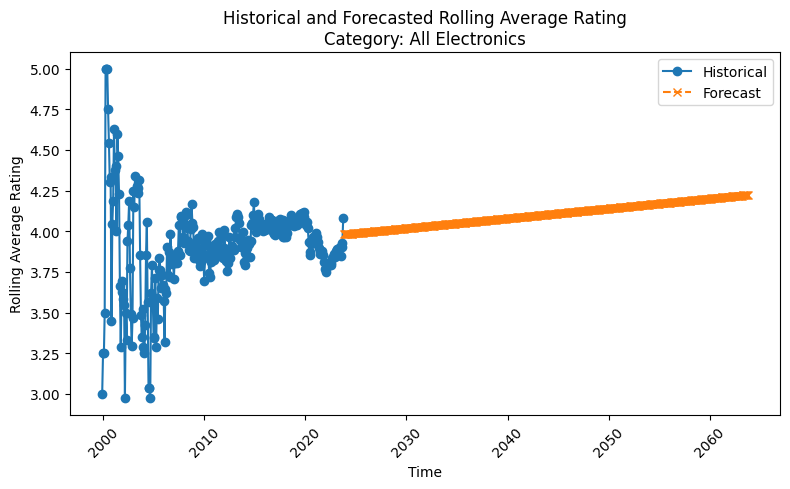

Skipping forecast for 'Cell Phone & Camera w. Accessories' - forecast produced NaN values.


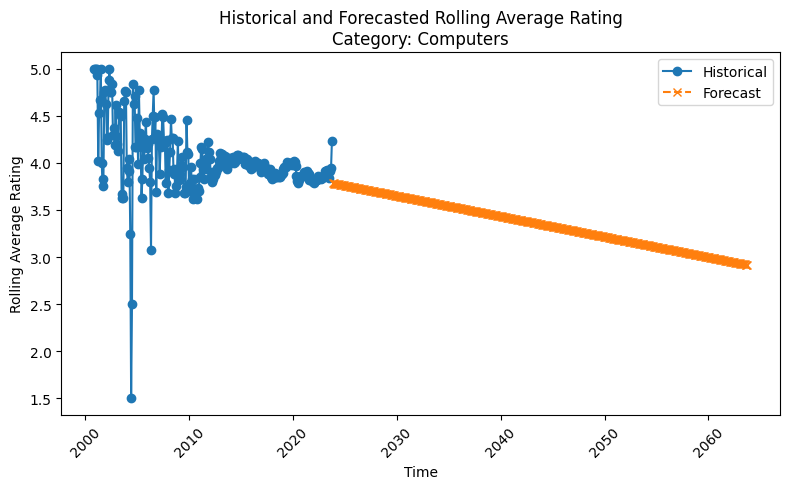

Skipping forecast for 'Daily Gadgets' - forecast produced NaN values.
Skipping forecast for 'Media' - forecast produced NaN values.


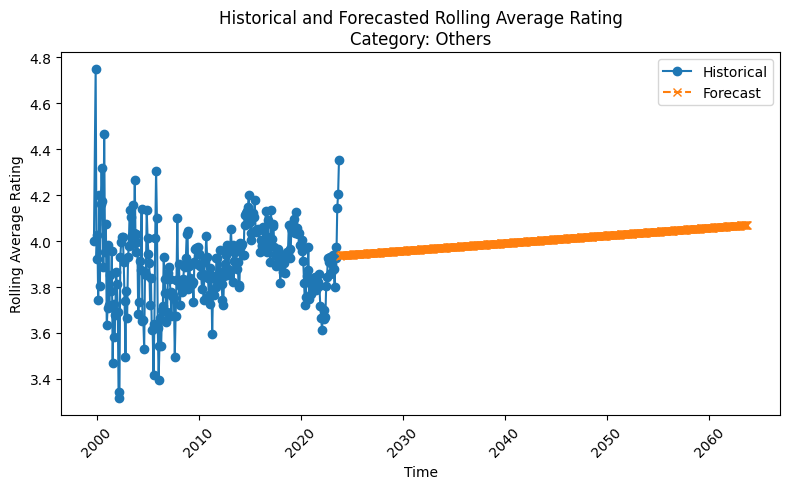

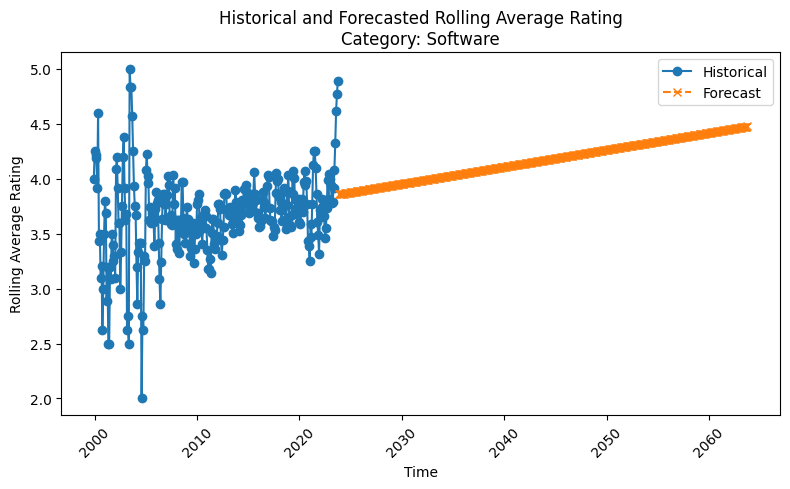

Skipping forecast for 'Sports & Health' - forecast produced NaN values.
Skipping forecast for 'Toys & Games' - forecast produced NaN values.


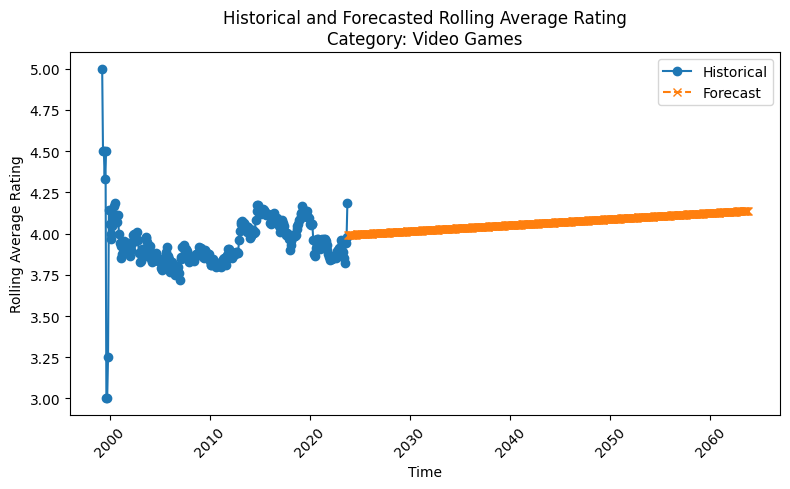

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Load Data ---
df = pd.read_csv("rolling_time_window_with_category.csv", parse_dates=["timestamp"])

# --- Step 2: Aggregate Data by Category and Timestamp ---
cat_monthly = df.groupby(["new_category", "timestamp"])["rolling_avg_rating"].mean().reset_index()

# Forecast 24 months (2 years) beyond the last available timestamp
future_periods = 480

# Get unique categories
categories = cat_monthly["new_category"].unique()

for cat in categories:
    # Filter data for this category
    data = cat_monthly[cat_monthly["new_category"] == cat].sort_values("timestamp").copy()
    
    if len(data) < 2 or data["rolling_avg_rating"].isna().all():
        print(f"Skipping forecast for '{cat}' - insufficient or invalid data.")
        continue
    
    # Convert timestamp to numeric
    data["time_numeric"] = data["timestamp"].map(pd.Timestamp.toordinal)
    
    X = data["time_numeric"].values
    y = data["rolling_avg_rating"].values
    
    # Check if we have at least two distinct timestamps and ratings
    if len(np.unique(X)) < 2:
        print(f"Skipping forecast for '{cat}' - all timestamps are the same.")
        continue
    if len(np.unique(y[~np.isnan(y)])) < 2:
        print(f"Skipping forecast for '{cat}' - ratings are all the same or NaN.")
        continue
    
    # Fit a linear model
    try:
        coef = np.polyfit(X, y, 1)  # slope, intercept
    except np.RankWarning:
        print(f"Skipping forecast for '{cat}' - rank warning (poorly conditioned fit).")
        continue
    
    poly1d_fn = np.poly1d(coef)
    
    # Forecast future months
    last_date = data["timestamp"].max()
    future_dates = [last_date + pd.DateOffset(months=i) for i in range(1, future_periods + 1)]
    future_numeric = np.array([d.toordinal() for d in future_dates])
    future_preds = poly1d_fn(future_numeric)
    
    # If the forecast is NaN, skip
    if np.isnan(future_preds).any():
        print(f"Skipping forecast for '{cat}' - forecast produced NaN values.")
        continue
    
    # Plot for this category
    plt.figure(figsize=(8, 5))
    plt.plot(data["timestamp"], data["rolling_avg_rating"], marker="o", label="Historical")
    plt.plot(future_dates, future_preds, marker="x", linestyle="--", label="Forecast")
    
    plt.title(f"Historical and Forecasted Rolling Average Rating\nCategory: {cat}")
    plt.xlabel("Time")
    plt.ylabel("Rolling Average Rating")
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# How does [image count] affect the [product rating number]?
# How does [video count] affect the [product rating number]?

  parent_asin  metrics  image_count  rating_number  video_count
0  0007922582    1,1,0            1              1            0
1  0008288194  1,166,0            1            166            0
2  0028179714   1,13,0            1             13            0
3  0060501960  0,162,0            0            162            0
4  0063052164   2,64,0            2             64            0


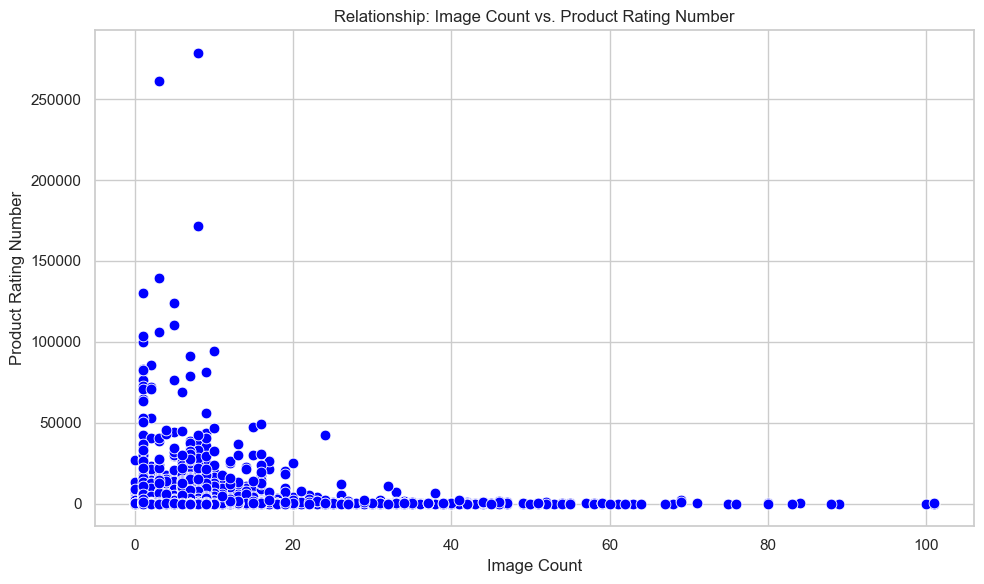

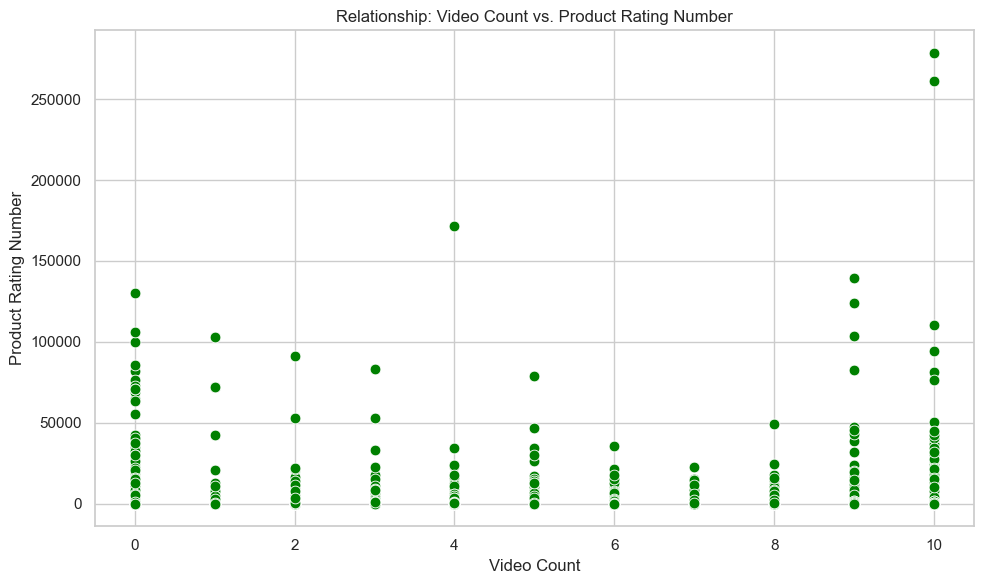

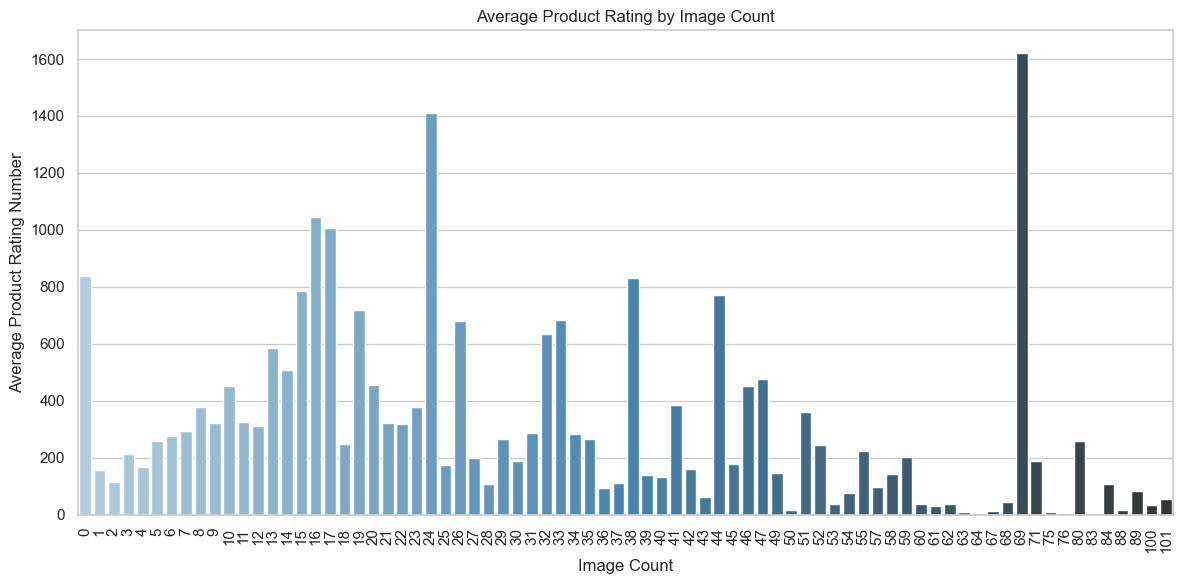

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file.
# Assumes no header and that columns are separated by a tab.
df = pd.read_csv("ProductMetadataAnalysisResults.csv", sep="\t", header=None, names=["parent_asin", "metrics"])

# Split the metrics column into three columns.
# The metrics column is a string like "1,1,0"
df[['image_count', 'rating_number', 'video_count']] = df['metrics'].str.split(",", expand=True)

# Convert the new columns to numeric types.
df['image_count'] = pd.to_numeric(df['image_count'], errors='coerce')
df['rating_number'] = pd.to_numeric(df['rating_number'], errors='coerce')
df['video_count'] = pd.to_numeric(df['video_count'], errors='coerce')

# Optional: Drop rows with missing values (if any)
df.dropna(inplace=True)

# Let's print the head to verify the parsing.
print(df.head())

# Set Seaborn style.
sns.set(style="whitegrid")

# -------------------------------
# Visualization 1: Image Count vs. Product Rating Number
# -------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="image_count", y="rating_number", color="blue", s=60)
plt.title("Relationship: Image Count vs. Product Rating Number")
plt.xlabel("Image Count")
plt.ylabel("Product Rating Number")
plt.tight_layout()
plt.show()

# -------------------------------
# Visualization 2: Video Count vs. Product Rating Number
# -------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="video_count", y="rating_number", color="green", s=60)
plt.title("Relationship: Video Count vs. Product Rating Number")
plt.xlabel("Video Count")
plt.ylabel("Product Rating Number")
plt.tight_layout()
plt.show()

# -------------------------------
# Optional: If image count is a discrete variable, show a bar chart of average rating by image count.
# -------------------------------
df_grouped = df.groupby("image_count")["rating_number"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x="image_count", y="rating_number", palette="Blues_d")
plt.title("Average Product Rating by Image Count")
plt.xlabel("Image Count")
plt.ylabel("Average Product Rating Number")

# Rotate the x-axis labels by 45 or 90 degrees:
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# Check 69 images

In [14]:
import pandas as pd

# Load the CSV file (no header, tab-separated).
df = pd.read_csv("ProductMetadataAnalysisResults.csv", 
                 sep="\t", 
                 header=None, 
                 names=["parent_asin", "metrics"])

# The "metrics" column is something like "image_count,rating_number,video_count"
# Let's split that into three columns.
df[["image_count", "rating_number", "video_count"]] = df["metrics"].str.split(",", expand=True)

# Convert image_count to a numeric type so we can compare it to 69.
df["image_count"] = pd.to_numeric(df["image_count"], errors="coerce")

# Now count how many rows have image_count == 69.
num_with_69_images = (df["image_count"] == 0).sum()

print(f"Number of products with 69 images: {num_with_69_images}")


Number of products with 69 images: 142


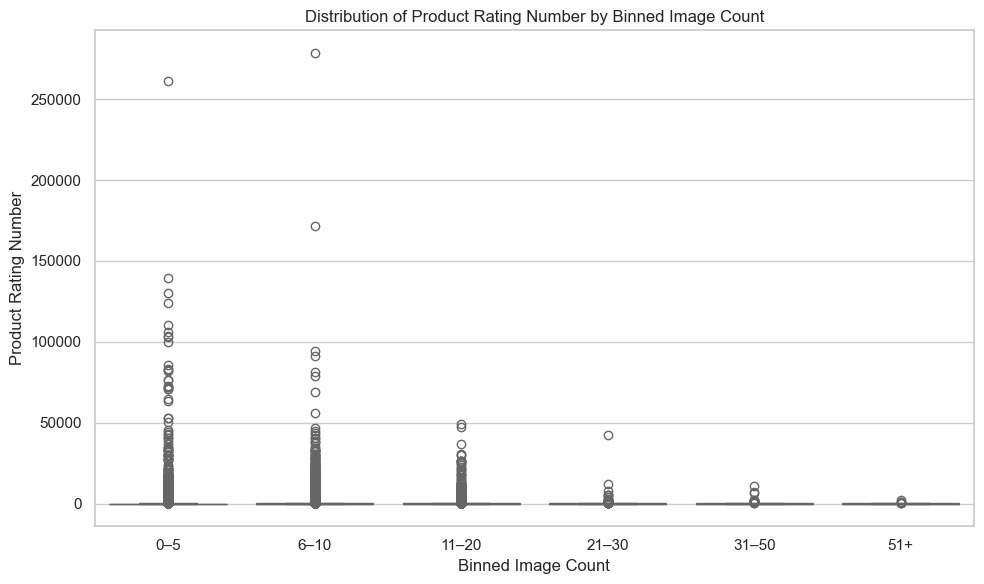

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load your CSV (e.g., ProductMetadataAnalysisResults.csv) 
#    which has columns: [parent_asin, metrics], 
#    where 'metrics' = "image_count,rating_number,video_count".
df = pd.read_csv("ProductMetadataAnalysisResults.csv", sep="\t", header=None, names=["parent_asin", "metrics"])

# 2. Split the 'metrics' column into separate numeric columns.
df[["image_count", "rating_number", "video_count"]] = df["metrics"].str.split(",", expand=True)
df["image_count"] = pd.to_numeric(df["image_count"], errors="coerce")
df["rating_number"] = pd.to_numeric(df["rating_number"], errors="coerce")
df["video_count"] = pd.to_numeric(df["video_count"], errors="coerce")

df.dropna(inplace=True)

# 3. Define a function that bins the image_count into categories:
def bin_image_count(x):
    if x <= 5:
        return "0–5"
    elif x <= 10:
        return "6–10"
    elif x <= 20:
        return "11–20"
    elif x <= 30:
        return "21–30"
    elif x <= 50:
        return "31–50"
    else:
        return "51+"

# 4. Apply the binning function to create a new column 'image_bin'.
df["image_bin"] = df["image_count"].apply(bin_image_count)

# 5. Create a box plot of rating_number for each image_bin.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x="image_bin", y="rating_number", showfliers=True, palette="Set3")

plt.title("Distribution of Product Rating Number by Binned Image Count")
plt.xlabel("Binned Image Count")
plt.ylabel("Product Rating Number")

# Optional: If you suspect huge outliers, you could use a log scale on the y-axis:
# plt.yscale("log")

plt.tight_layout()
plt.show()


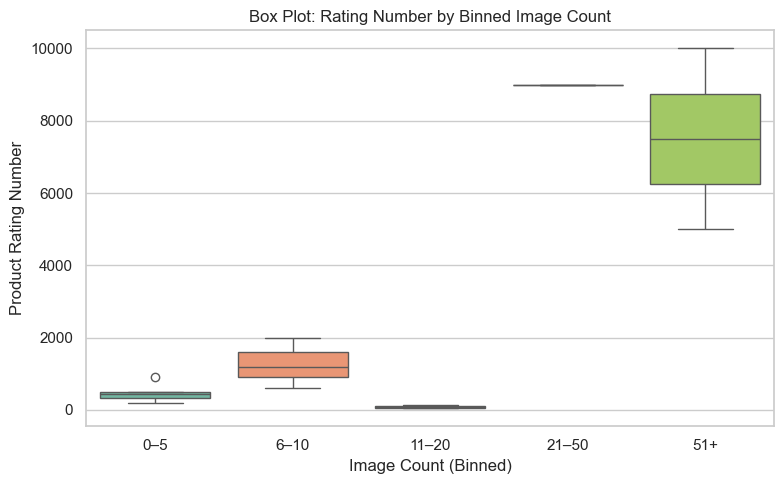

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Suppose you already have a DataFrame called df with columns:
# [ "image_count", "rating_number" ]
# We'll bin the image_count into a new column called "image_bin" 
# and then do a boxplot of rating_number vs. image_bin.

# 1. For demonstration, create a small sample dataset:
data = {
    "image_count": [0, 1, 2, 2, 5, 5, 7, 8, 10, 12, 12, 12, 40, 55, 55],
    "rating_number": [500, 300, 200, 900, 400, 500, 2000, 600, 1200, 50, 80, 150, 9000, 10000, 5000]
}
df = pd.DataFrame(data)

# 2. Define bins for image_count
def bin_image_count(x):
    if x <= 5:
        return "0–5"
    elif x <= 10:
        return "6–10"
    elif x <= 20:
        return "11–20"
    elif x <= 50:
        return "21–50"
    else:
        return "51+"

df["image_bin"] = df["image_count"].apply(bin_image_count)

# 3. Create a boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.boxplot(data=df, x="image_bin", y="rating_number", showfliers=True, palette="Set2")

plt.title("Box Plot: Rating Number by Binned Image Count")
plt.xlabel("Image Count (Binned)")
plt.ylabel("Product Rating Number")

plt.tight_layout()
plt.show()


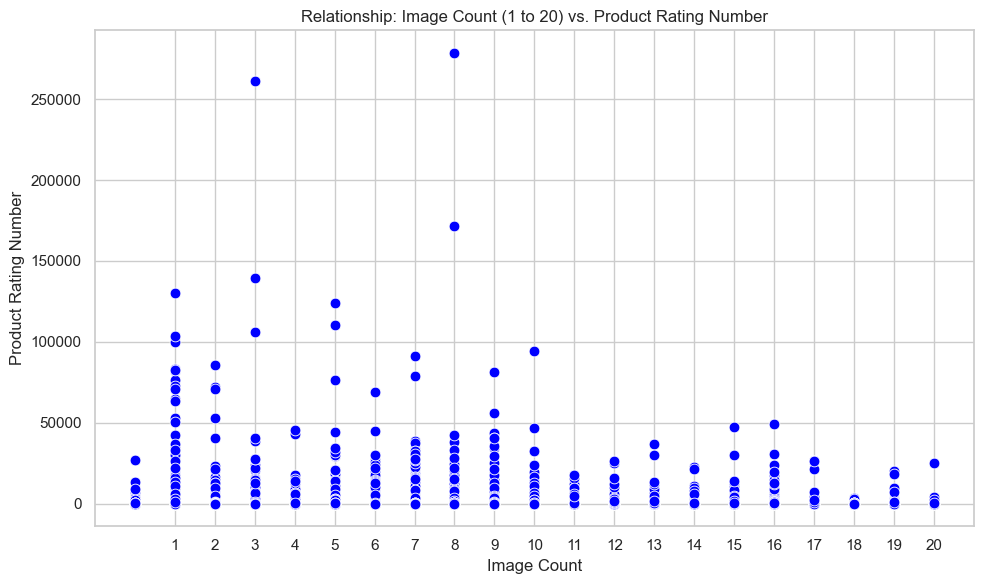

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file (ProductMetadataAnalysisResults.csv).
# Assumes no header and columns separated by a tab.
df = pd.read_csv("ProductMetadataAnalysisResults.csv", sep="\t", header=None, 
                 names=["parent_asin", "metrics"])

# Split the 'metrics' column (which is a string like "image_count,rating_number,video_count")
df[['image_count', 'rating_number', 'video_count']] = df['metrics'].str.split(",", expand=True)

# Convert columns to numeric types.
df['image_count'] = pd.to_numeric(df['image_count'], errors='coerce')
df['rating_number'] = pd.to_numeric(df['rating_number'], errors='coerce')
df['video_count'] = pd.to_numeric(df['video_count'], errors='coerce')

# Drop rows with missing values.
df.dropna(inplace=True)

# Filter the DataFrame to include only products with image_count from 1 to 20.
df_filtered = df[(df['image_count'] >= 0) & (df['image_count'] <= 20)]

# Set Seaborn style.
sns.set(style="whitegrid")

# Create a scatter plot for image_count vs. product rating number.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x="image_count", y="rating_number", color="blue", s=60)
plt.title("Relationship: Image Count (1 to 20) vs. Product Rating Number")
plt.xlabel("Image Count")
plt.ylabel("Product Rating Number")
plt.xticks(range(1, 21))  # Set x-axis ticks from 1 to 20.
plt.tight_layout()
plt.show()


# Product Features Analysis

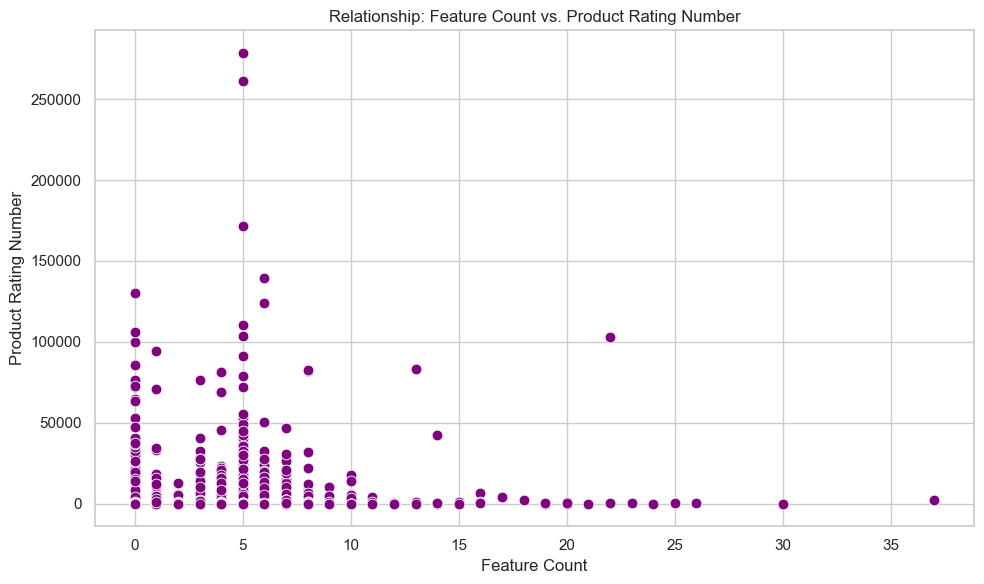

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the features CSV (ProductFeaturesAnalysisResults.csv)
#    Format: parent_asin, feature_count
df_features = pd.read_csv("ProductFeaturesAnalysisResults.csv",
                          sep="\t", header=None, names=["parent_asin", "feature_count"])

# Convert feature_count to numeric
df_features["feature_count"] = pd.to_numeric(df_features["feature_count"], errors="coerce")

# 2. Load the metadata CSV (ProductMetadataAnalysisResults.csv)
#    Format: parent_asin, "image_count,rating_number,video_count"
df_ratings = pd.read_csv("ProductMetadataAnalysisResults.csv",
                         sep="\t", header=None, names=["parent_asin", "metrics"])

# Split out the metrics into separate columns
df_ratings[["image_count", "rating_number", "video_count"]] = df_ratings["metrics"].str.split(",", expand=True)

# Convert rating_number to numeric
df_ratings["rating_number"] = pd.to_numeric(df_ratings["rating_number"], errors="coerce")

# 3. Merge the two DataFrames on parent_asin
df_merged = pd.merge(df_features[["parent_asin", "feature_count"]],
                     df_ratings[["parent_asin", "rating_number"]],
                     on="parent_asin", how="inner")

# Drop rows where we don't have valid data
df_merged.dropna(subset=["feature_count", "rating_number"], inplace=True)

# 4. Create a scatter plot of feature_count vs. rating_number
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_merged, x="feature_count", y="rating_number", color="purple", s=60)
plt.title("Relationship: Feature Count vs. Product Rating Number")
plt.xlabel("Feature Count")
plt.ylabel("Product Rating Number")

# Optionally, use a log scale if rating_number has extreme outliers:
# plt.yscale("log")

plt.tight_layout()
plt.show()


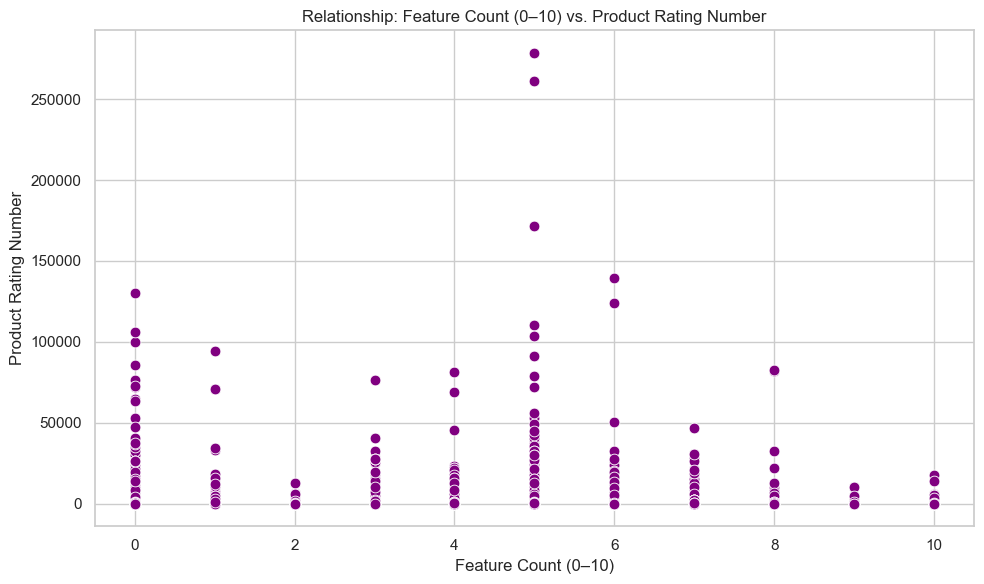

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and merge your data as before
df_features = pd.read_csv("ProductFeaturesAnalysisResults.csv",
                          sep="\t", header=None, names=["parent_asin", "feature_count"])
df_features["feature_count"] = pd.to_numeric(df_features["feature_count"], errors="coerce")

df_ratings = pd.read_csv("ProductMetadataAnalysisResults.csv",
                         sep="\t", header=None, names=["parent_asin", "metrics"])
df_ratings[["image_count", "rating_number", "video_count"]] = df_ratings["metrics"].str.split(",", expand=True)
df_ratings["rating_number"] = pd.to_numeric(df_ratings["rating_number"], errors="coerce")

df_merged = pd.merge(
    df_features[["parent_asin", "feature_count"]],
    df_ratings[["parent_asin", "rating_number"]],
    on="parent_asin",
    how="inner"
)
df_merged.dropna(subset=["feature_count", "rating_number"], inplace=True)

# 2. Filter for feature_count between 0 and 10
df_filtered = df_merged[(df_merged["feature_count"] >= 0) & (df_merged["feature_count"] <= 10)]

# 3. Create the scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_filtered, x="feature_count", y="rating_number", color="purple", s=60)
plt.title("Relationship: Feature Count (0–10) vs. Product Rating Number")
plt.xlabel("Feature Count (0–10)")
plt.ylabel("Product Rating Number")

plt.tight_layout()
plt.show()


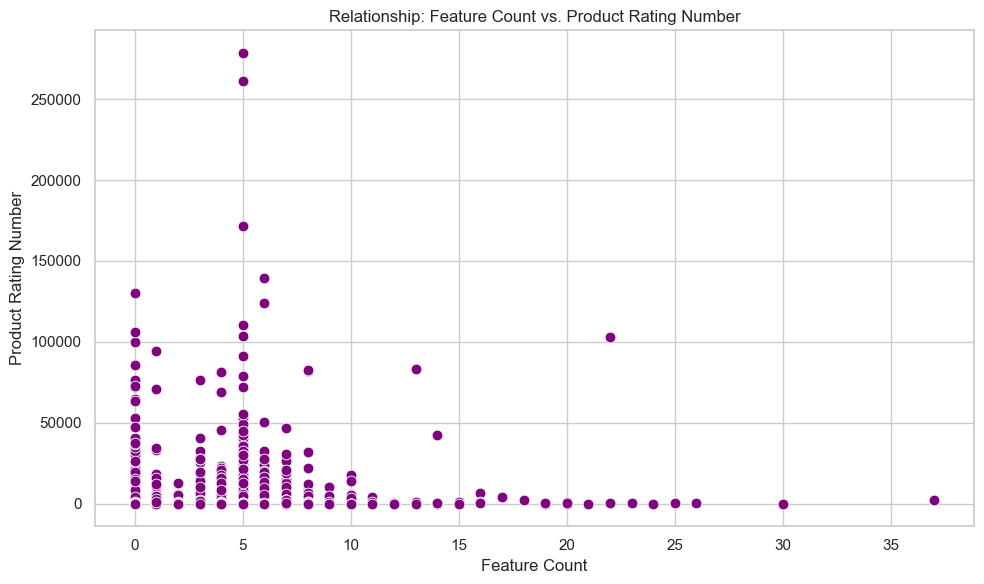

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the updated CSV file.
# Assumes no header and tab-separated values.
df = pd.read_csv("ProductFeaturesAnalysisResultsUpdated.csv", 
                 sep="\t", header=None, 
                 names=["parent_asin", "features_rating"])

# Split the 'features_rating' column into two separate columns:
# 'feature_count' and 'rating_number'
df[['feature_count', 'rating_number']] = df['features_rating'].str.split(",", expand=True)

# Convert the new columns to numeric types.
df["feature_count"] = pd.to_numeric(df["feature_count"], errors="coerce")
df["rating_number"] = pd.to_numeric(df["rating_number"], errors="coerce")

# Drop any rows with missing data (if conversion failed)
df.dropna(subset=["feature_count", "rating_number"], inplace=True)

# Set Seaborn style.
sns.set(style="whitegrid")

# Create a scatter plot: x-axis = feature_count, y-axis = rating_number.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="feature_count", y="rating_number", color="purple", s=60)

plt.title("Relationship: Feature Count vs. Product Rating Number")
plt.xlabel("Feature Count")
plt.ylabel("Product Rating Number")

plt.tight_layout()
plt.show()


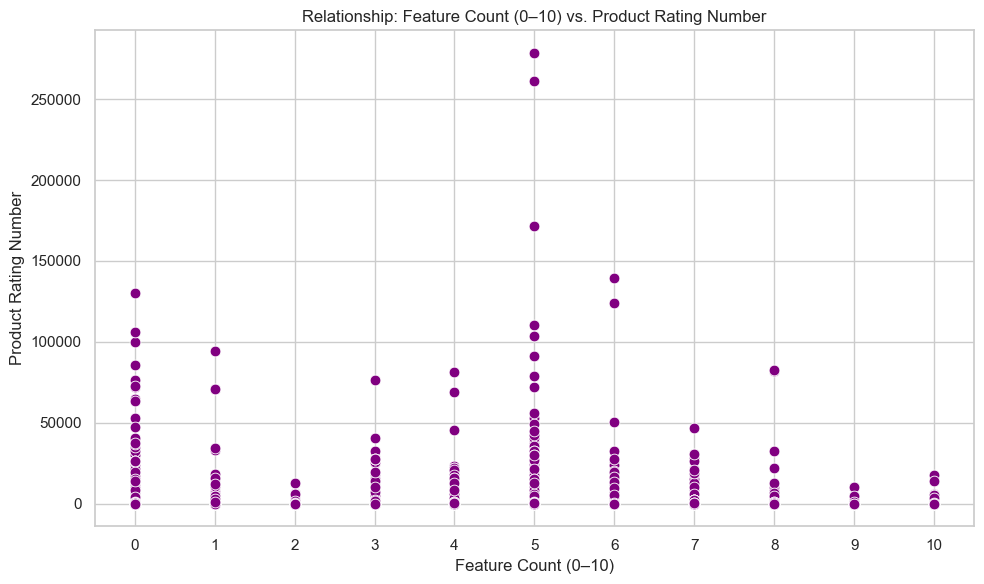

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated CSV file.
df = pd.read_csv("ProductFeaturesAnalysisResultsUpdated.csv", 
                 sep="\t", header=None, 
                 names=["parent_asin", "features_rating"])

# Split the 'features_rating' column into two separate columns.
df[['feature_count', 'rating_number']] = df['features_rating'].str.split(",", expand=True)

# Convert the new columns to numeric types.
df["feature_count"] = pd.to_numeric(df["feature_count"], errors="coerce")
df["rating_number"] = pd.to_numeric(df["rating_number"], errors="coerce")

# Drop rows with missing values.
df.dropna(subset=["feature_count", "rating_number"], inplace=True)

# Filter the DataFrame for feature_count between 0 and 10.
df_filtered = df[(df["feature_count"] >= 0) & (df["feature_count"] <= 10)]

# Set Seaborn style.
sns.set(style="whitegrid")

# Create the scatter plot for feature_count vs. rating_number.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x="feature_count", y="rating_number", color="purple", s=60)
plt.title("Relationship: Feature Count (0–10) vs. Product Rating Number")
plt.xlabel("Feature Count (0–10)")
plt.ylabel("Product Rating Number")
plt.xticks(range(0, 11))  # Set x-axis ticks from 0 to 10.
plt.tight_layout()
plt.show()


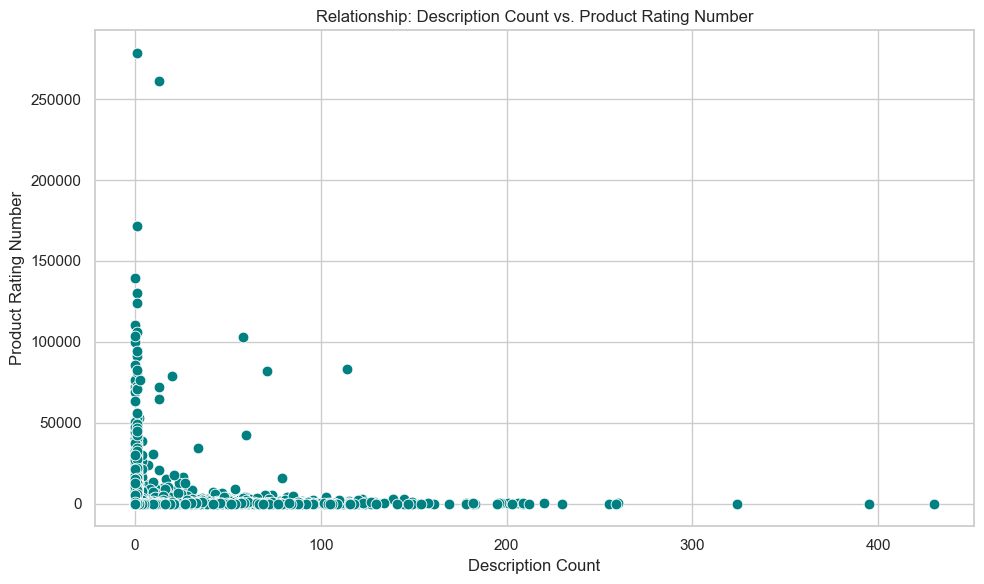

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file.
# The CSV is assumed to be tab-separated with no header.
df = pd.read_csv("ProductDescriptionAnalysisResults.csv", 
                 sep="\t", header=None, 
                 names=["parent_asin", "desc_rating"])

# Split the "desc_rating" column into two separate columns:
# "description_count" and "rating_number"
df[['description_count', 'rating_number']] = df['desc_rating'].str.split(",", expand=True)

# Convert the new columns to numeric types.
df["description_count"] = pd.to_numeric(df["description_count"], errors="coerce")
df["rating_number"] = pd.to_numeric(df["rating_number"], errors="coerce")

# Drop rows with missing values.
df.dropna(subset=["description_count", "rating_number"], inplace=True)

# Set the Seaborn style.
sns.set(style="whitegrid")

# Create a scatter plot of description_count vs. rating_number.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="description_count", y="rating_number", color="teal", s=60)

plt.title("Relationship: Description Count vs. Product Rating Number")
plt.xlabel("Description Count")
plt.ylabel("Product Rating Number")
plt.tight_layout()
plt.show()


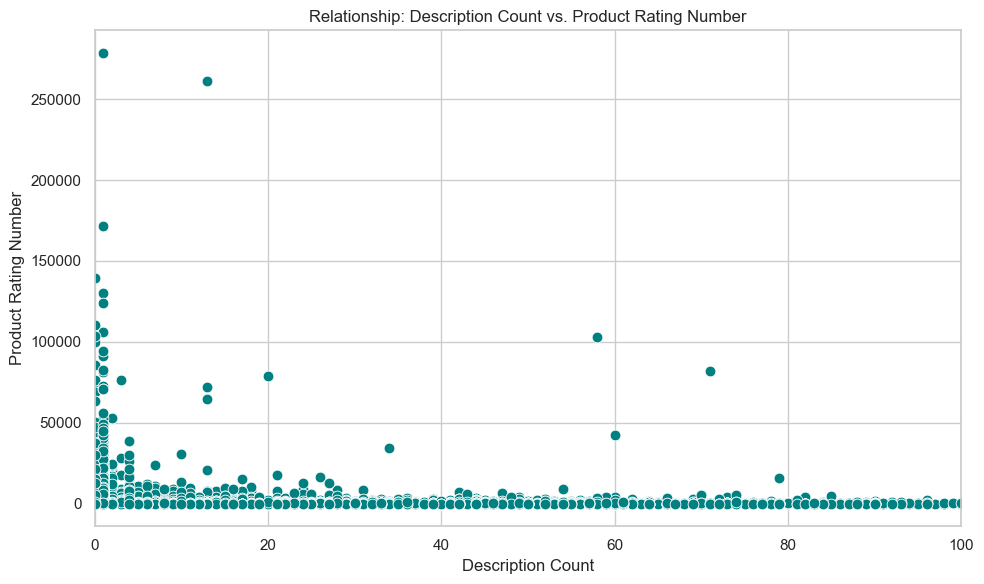

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file.
df = pd.read_csv("ProductDescriptionAnalysisResults.csv", 
                 sep="\t", header=None, 
                 names=["parent_asin", "desc_rating"])

# Split the "desc_rating" column into two separate columns:
df[['description_count', 'rating_number']] = df['desc_rating'].str.split(",", expand=True)

# Convert the new columns to numeric types.
df["description_count"] = pd.to_numeric(df["description_count"], errors="coerce")
df["rating_number"] = pd.to_numeric(df["rating_number"], errors="coerce")

# Drop rows with missing values.
df.dropna(subset=["description_count", "rating_number"], inplace=True)

# Set the Seaborn style.
sns.set(style="whitegrid")

# Create a scatter plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="description_count", y="rating_number", color="teal", s=60)

plt.title("Relationship: Description Count vs. Product Rating Number")
plt.xlabel("Description Count")
plt.ylabel("Product Rating Number")

# Limit the x-axis range to 0 to 100.
plt.xlim(0, 100)

plt.tight_layout()
plt.show()


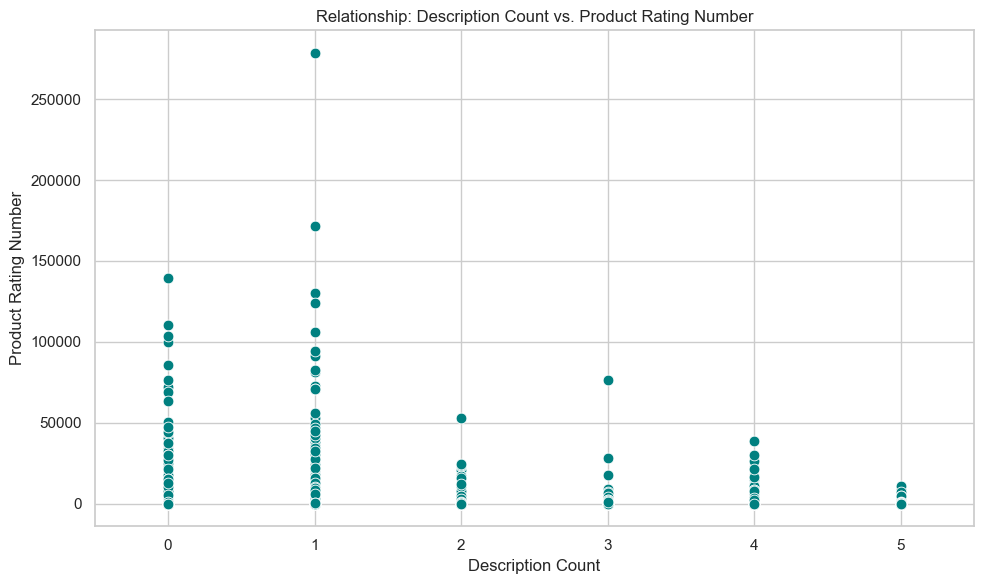

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file.
df = pd.read_csv("ProductDescriptionAnalysisResults.csv", 
                 sep="\t", header=None, 
                 names=["parent_asin", "desc_rating"])

# Split the "desc_rating" column into two separate columns:
df[['description_count', 'rating_number']] = df['desc_rating'].str.split(",", expand=True)

# Convert the new columns to numeric types.
df["description_count"] = pd.to_numeric(df["description_count"], errors="coerce")
df["rating_number"] = pd.to_numeric(df["rating_number"], errors="coerce")

# Drop rows with missing values.
df.dropna(subset=["description_count", "rating_number"], inplace=True)

# Set the Seaborn style.
sns.set(style="whitegrid")

# Create a scatter plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="description_count", y="rating_number", color="teal", s=60)

plt.title("Relationship: Description Count vs. Product Rating Number")
plt.xlabel("Description Count")
plt.ylabel("Product Rating Number")

# Limit the x-axis range to 0 to 100.
plt.xlim(-0.5, 5.5)

plt.tight_layout()
plt.show()


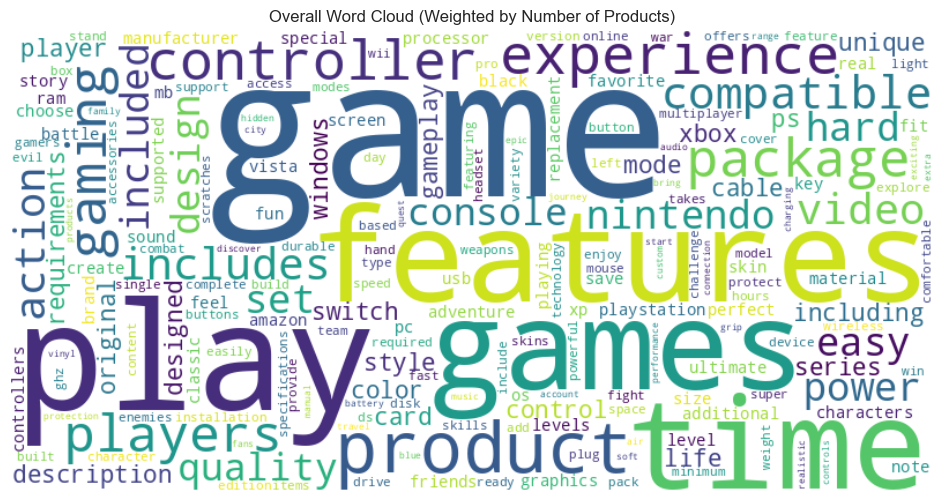

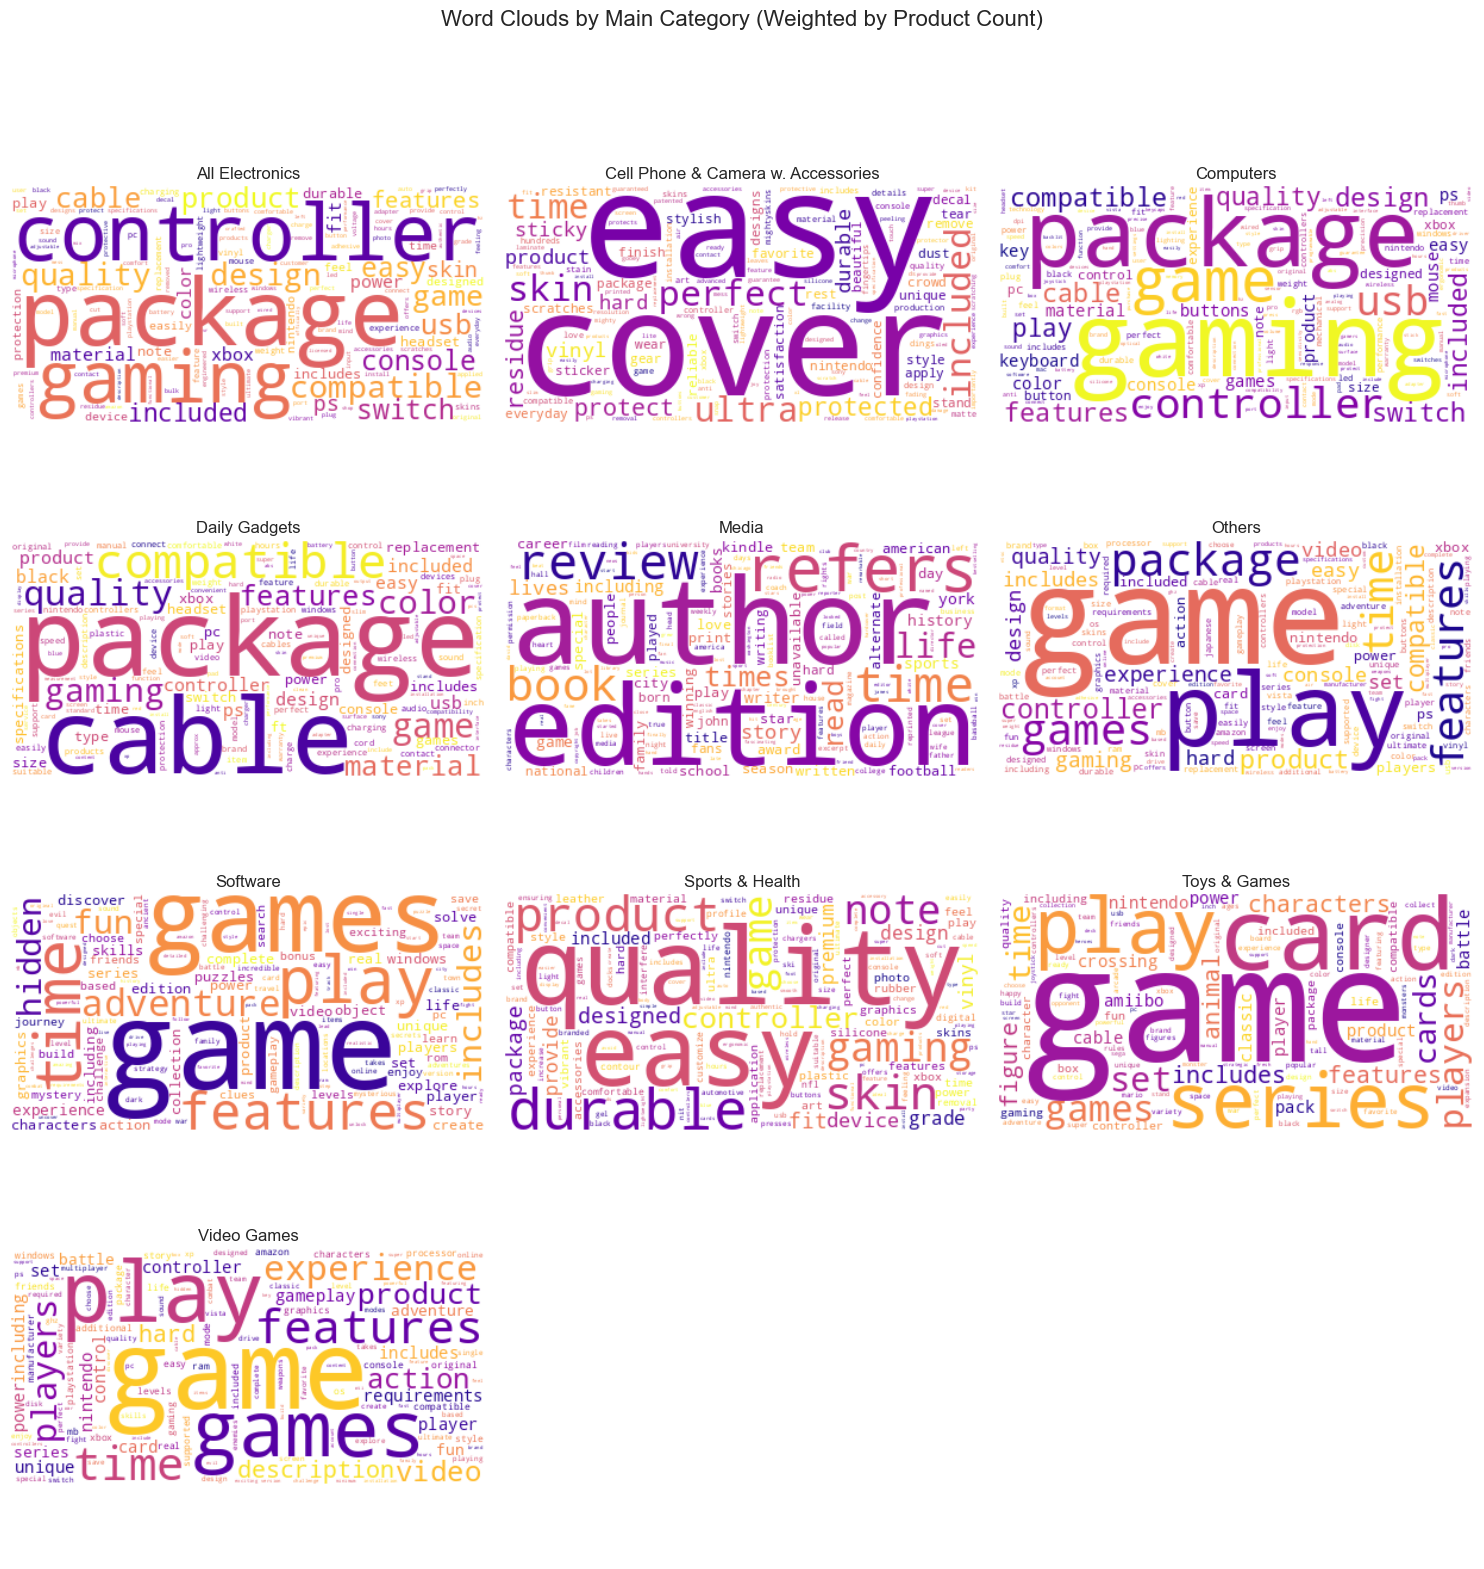

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the CSV file. 
# Assumes the file is tab-delimited with no header.
# Each row is expected to have three columns:
#   main_category, word, stats
# where stats is a comma-separated string: product_count,total_ratings,average_rating
df = pd.read_csv("DescriptionTokenAnalysisResults.csv", 
                 sep="\t", 
                 header=None, 
                 names=["main_category", "word", "stats"])

# Split the "stats" column into three separate columns.
df[['product_count','total_ratings','average_rating']] = df['stats'].str.split(",", expand=True)

# Convert numeric columns to appropriate types.
df['product_count'] = df['product_count'].astype(int)
df['total_ratings'] = df['total_ratings'].astype(int)
df['average_rating'] = df['average_rating'].astype(float)

# -----------------------------------------
# Overall Word Cloud using product_count as weight
# -----------------------------------------
# Create a dictionary mapping word -> product_count (frequency)
overall_freq = df.groupby("word")["product_count"].sum().to_dict()

wordcloud_overall = WordCloud(width=800, height=400, 
                              background_color="white", 
                              colormap="viridis").generate_from_frequencies(overall_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_overall, interpolation="bilinear")
plt.axis("off")
plt.title("Overall Word Cloud (Weighted by Number of Products)")
plt.show()

# -----------------------------------------
# Word Clouds per main category
# -----------------------------------------
# Get the unique main categories
categories = df["main_category"].unique()

# Create a figure with subplots for each category (adjust rows and columns as needed)
num_categories = len(categories)
cols = 3
rows = (num_categories + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axs = axs.flatten()  # Flatten to simplify indexing

for idx, cat in enumerate(categories):
    # For each category, create a frequency dictionary using product_count.
    cat_df = df[df["main_category"] == cat]
    cat_freq = cat_df.groupby("word")["product_count"].sum().to_dict()
    
    wc = WordCloud(width=400, height=200, 
                   background_color="white", 
                   colormap="plasma").generate_from_frequencies(cat_freq)
    
    axs[idx].imshow(wc, interpolation="bilinear")
    axs[idx].axis("off")
    axs[idx].set_title(cat)
    
# Remove any unused subplots
for j in range(idx+1, len(axs)):
    axs[j].axis("off")

plt.suptitle("Word Clouds by Main Category (Weighted by Product Count)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


- Get top 5 most user-engaged products overall
- Get top 5 most user-engaged products by main category

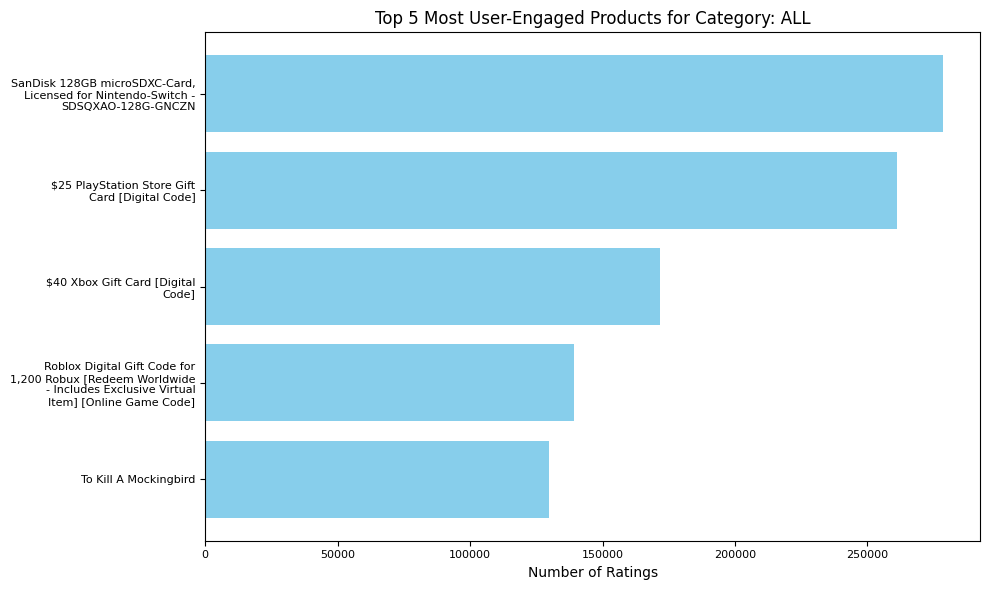

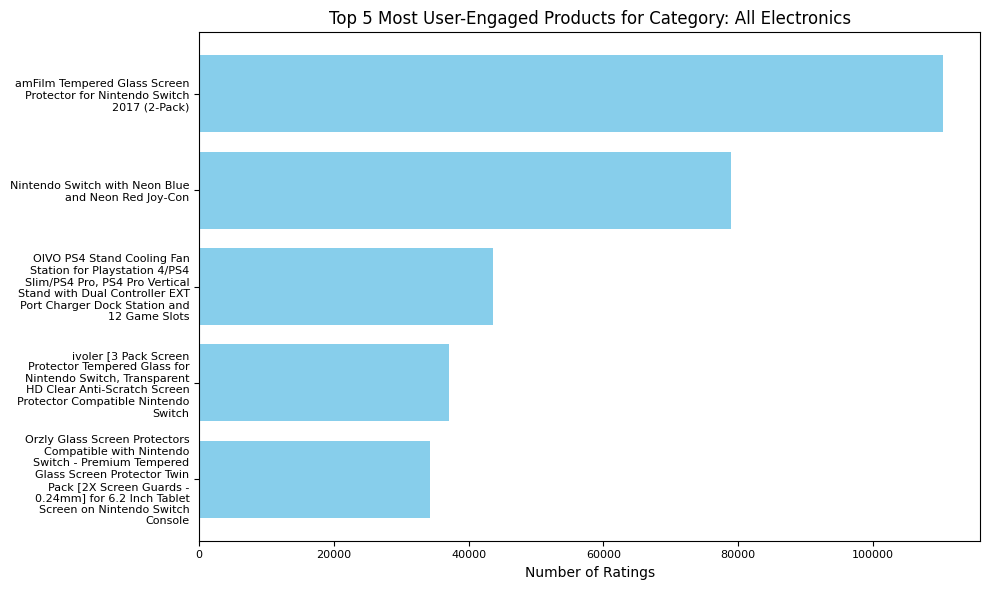

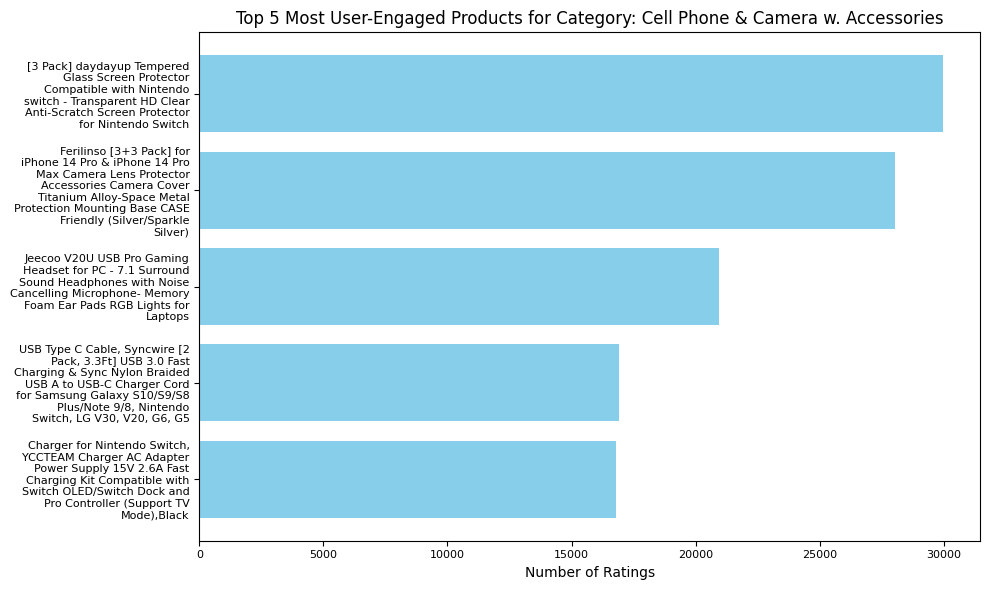

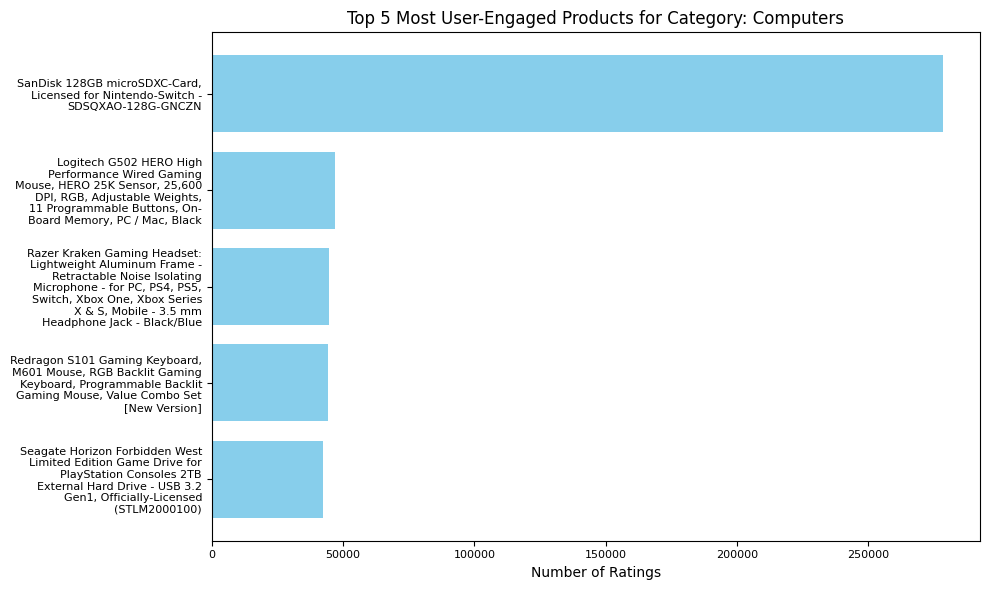

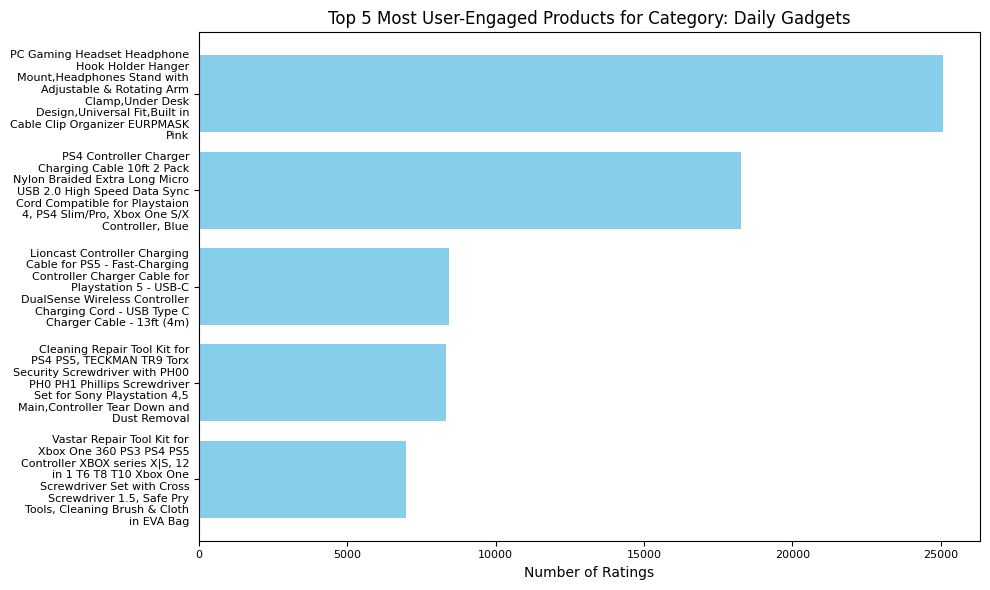

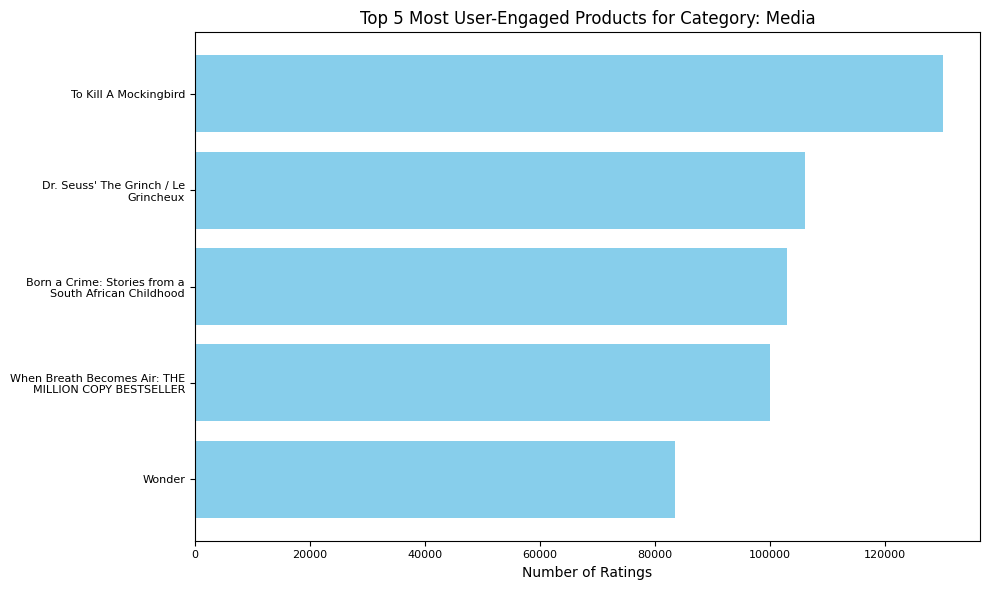

/var/folders/7z/gbbr_68x7x112w14vh8zpfv00000gn/T/ipykernel_6668/2084690996.py:84: UserWarning: Glyph 23453 (\N{CJK UNIFIED IDEOGRAPH-5B9D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7z/gbbr_68x7x112w14vh8zpfv00000gn/T/ipykernel_6668/2084690996.py:84: UserWarning: Glyph 30707 (\N{CJK UNIFIED IDEOGRAPH-77F3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7z/gbbr_68x7x112w14vh8zpfv00000gn/T/ipykernel_6668/2084690996.py:84: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7z/gbbr_68x7x112w14vh8zpfv00000gn/T/ipykernel_6668/2084690996.py:84: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7z/gbbr_68x7x112w14vh8zpfv00000gn/T/ipykernel_6668/2084690996.py:84: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7z/gbbr_68x7x112w14vh8zpfv000

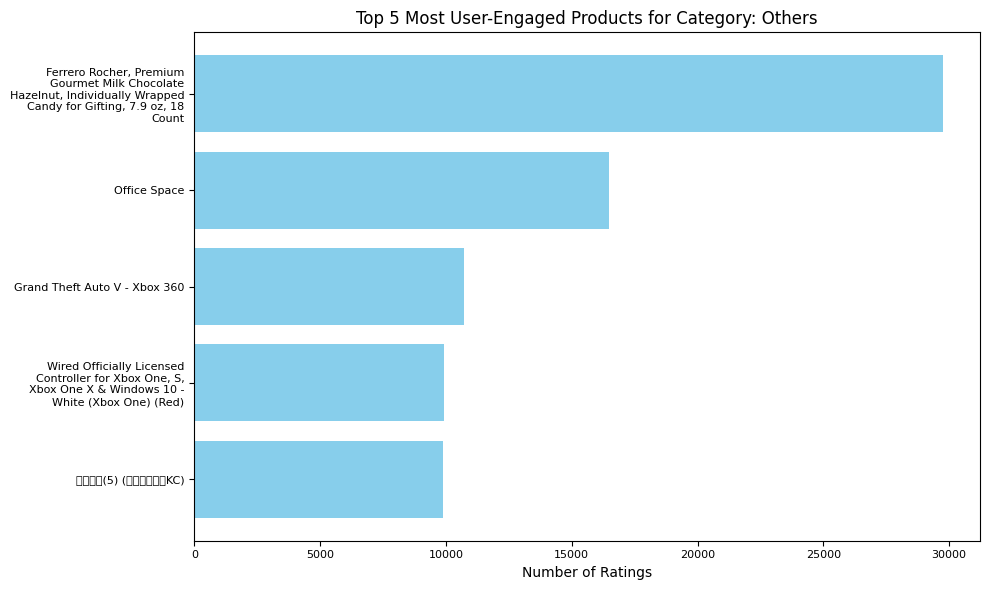

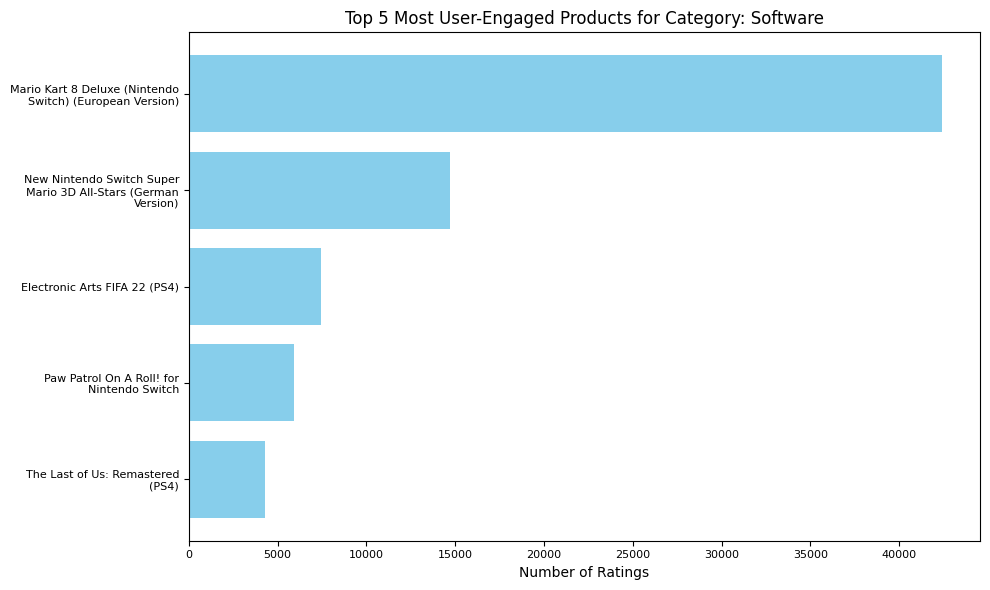

/var/folders/7z/gbbr_68x7x112w14vh8zpfv00000gn/T/ipykernel_6668/2084690996.py:84: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/junjie/lab10spark/myVenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


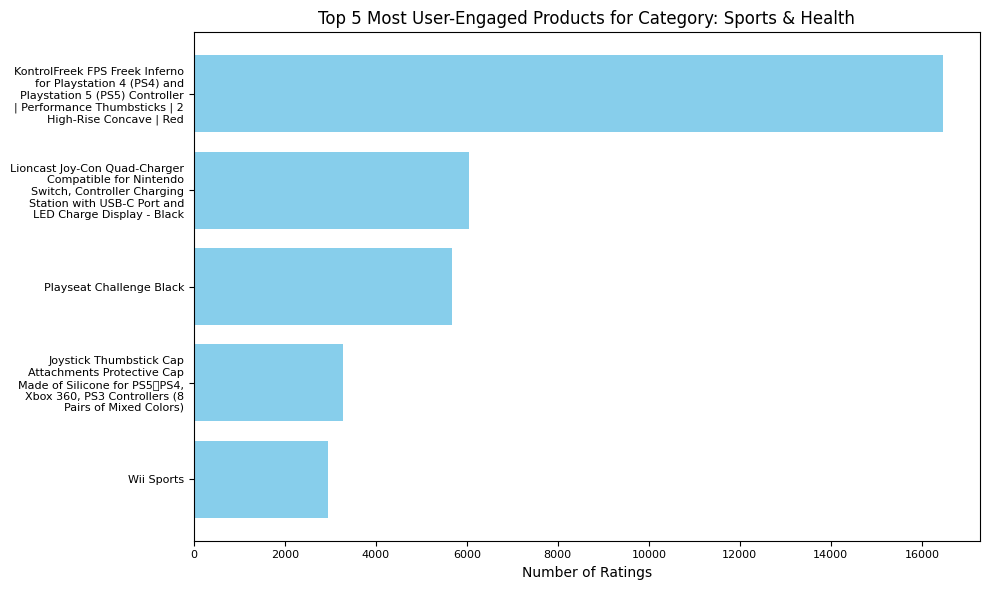

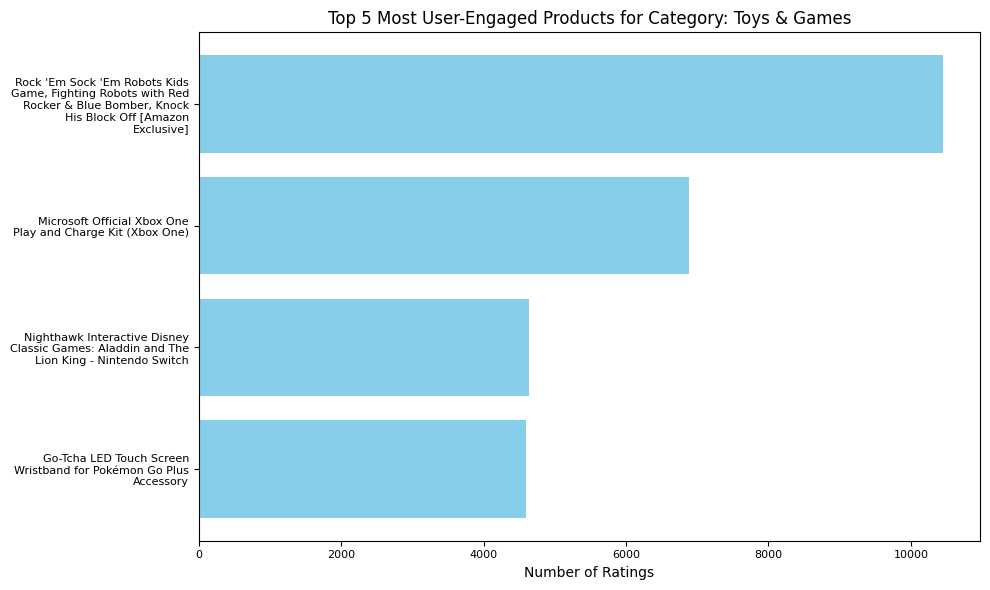

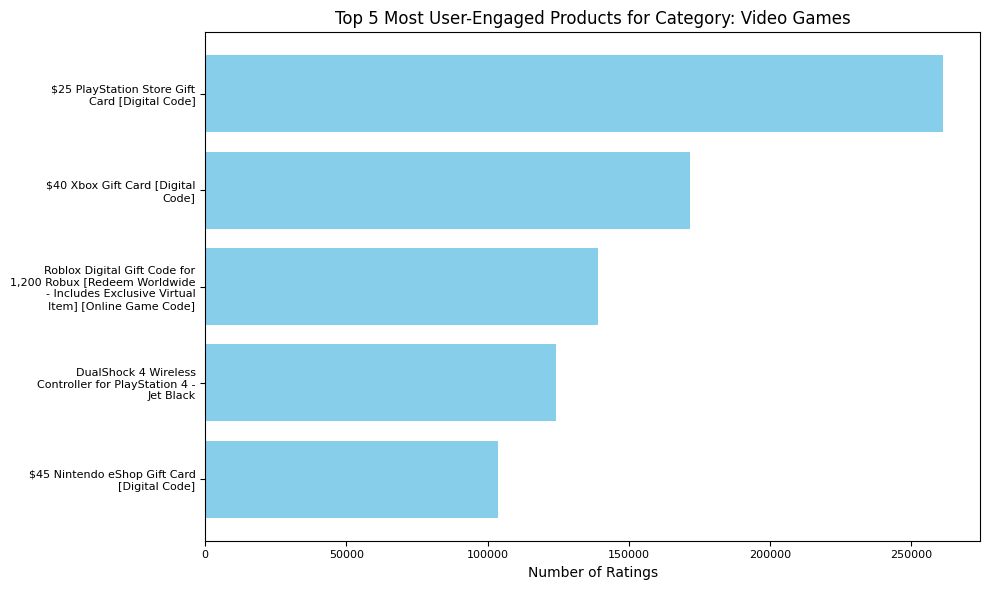

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# ---------------------------
# 1) Read and parse the CSV
# ---------------------------
file_path = '/Users/junjie/lab10spark/TopEngagementResults.csv'  # Adjust to your actual file path

records = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        
        # Locate the first and last commas
        first_comma = line.find(',')
        last_comma = line.rfind(',')
        
        # Skip if the format is not as expected
        if first_comma == -1 or last_comma == -1 or first_comma == last_comma:
            continue
        
        # Extract fields: category, product_title, rating
        category = line[:first_comma]
        product_title = line[first_comma + 1 : last_comma]
        
        try:
            rating = int(line[last_comma + 1 :])
        except ValueError:
            # Skip if rating is not an integer
            continue
        
        records.append({
            'category': category,
            'product_title': product_title,
            'rating': rating
        })

# ---------------------------
# 2) Create a DataFrame
# ---------------------------
df = pd.DataFrame(records)

# ---------------------------
# 3) Define a function to wrap labels
# ---------------------------
def wrap_labels(label, width=30):
    return "\n".join(textwrap.wrap(label, width))

# ---------------------------
# 4) Group by category and plot top 5 for each
# ---------------------------
grouped = df.groupby('category')

for category, group_data in grouped:
    # Sort by rating descending and select top 5
    top5 = group_data.sort_values(by='rating', ascending=False).head(5).copy()
    
    # If there are no products or fewer than 1, skip
    if top5.empty:
        continue
    
    # Wrap long product titles
    top5['wrapped_title'] = top5['product_title'].apply(lambda x: wrap_labels(x, 30))
    
    # Create a new figure for each category
    plt.figure(figsize=(10, 6))
    plt.barh(top5['wrapped_title'], top5['rating'], color='skyblue')
    
    # Title and labels
    plt.title(f"Top 5 Most User-Engaged Products for Category: {category}", fontsize=12)
    plt.xlabel('Number of Ratings', fontsize=10)
    
    # Adjust tick label fonts
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
    # Highest rating on top
    plt.gca().invert_yaxis()
    
    # Avoid overlapping labels
    plt.tight_layout()
    
    # Show each category figure
    plt.show()
